## Enhancing Loan Approval Process

Motive: Using this data set to find out credit card defaultees

In [63]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs


In [64]:
df_credit= pd.read_csv(r"C:\Users\ADITYA RAWAT\Downloads\Data Mining\Coursework\Datasets_data_mining_cw\fraud detection\application_data.csv\application_data.csv")

In [65]:
df_credit.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [66]:
df_credit.shape

(307511, 122)

In [67]:
df_credit.TARGET.value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [68]:
df_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [69]:
df_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [70]:
data_description_df=pd.read_csv(r"C:\Users\TAHA RAZVI\Downloads\Data Mining\Coursework\Datasets_data_mining_cw\fraud detection\columns_description.csv")

## To check Duplicate values

In [71]:
duplicate_count = df_credit.duplicated().sum()

# Print the count of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


## To check the column description excel sheet

In [72]:
data_description_df.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

## Checking the missing values

In [73]:
null_counts=df_credit.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)

In [74]:
# Filter columns with more than 0 null values
null_counts_filtered = null_counts_sorted[null_counts > 0]
print(null_counts_filtered)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


In [75]:
null_col = df_credit.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >(0.35*len(df_credit))]

In [76]:
null_col

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [77]:
def missing_data_calc(df_credit,percentage):
    missing_percentage = df_credit.isnull().mean() * 100
    missing_info = pd.DataFrame({
        'Column': missing_percentage.index,
        'Missing Percentage': missing_percentage.values
            })

    print(missing_info[missing_info['Missing Percentage'] > percentage])

In [16]:
missing_data_calc(df_credit,35)

                          Column  Missing Percentage
21                   OWN_CAR_AGE           65.990810
41                  EXT_SOURCE_1           56.381073
44                APARTMENTS_AVG           50.749729
45              BASEMENTAREA_AVG           58.515956
46   YEARS_BEGINEXPLUATATION_AVG           48.781019
47               YEARS_BUILD_AVG           66.497784
48                COMMONAREA_AVG           69.872297
49                 ELEVATORS_AVG           53.295980
50                 ENTRANCES_AVG           50.348768
51                 FLOORSMAX_AVG           49.760822
52                 FLOORSMIN_AVG           67.848630
53                  LANDAREA_AVG           59.376738
54          LIVINGAPARTMENTS_AVG           68.354953
55                LIVINGAREA_AVG           50.193326
56       NONLIVINGAPARTMENTS_AVG           69.432963
57             NONLIVINGAREA_AVG           55.179164
58               APARTMENTS_MODE           50.749729
59             BASEMENTAREA_MODE           58.

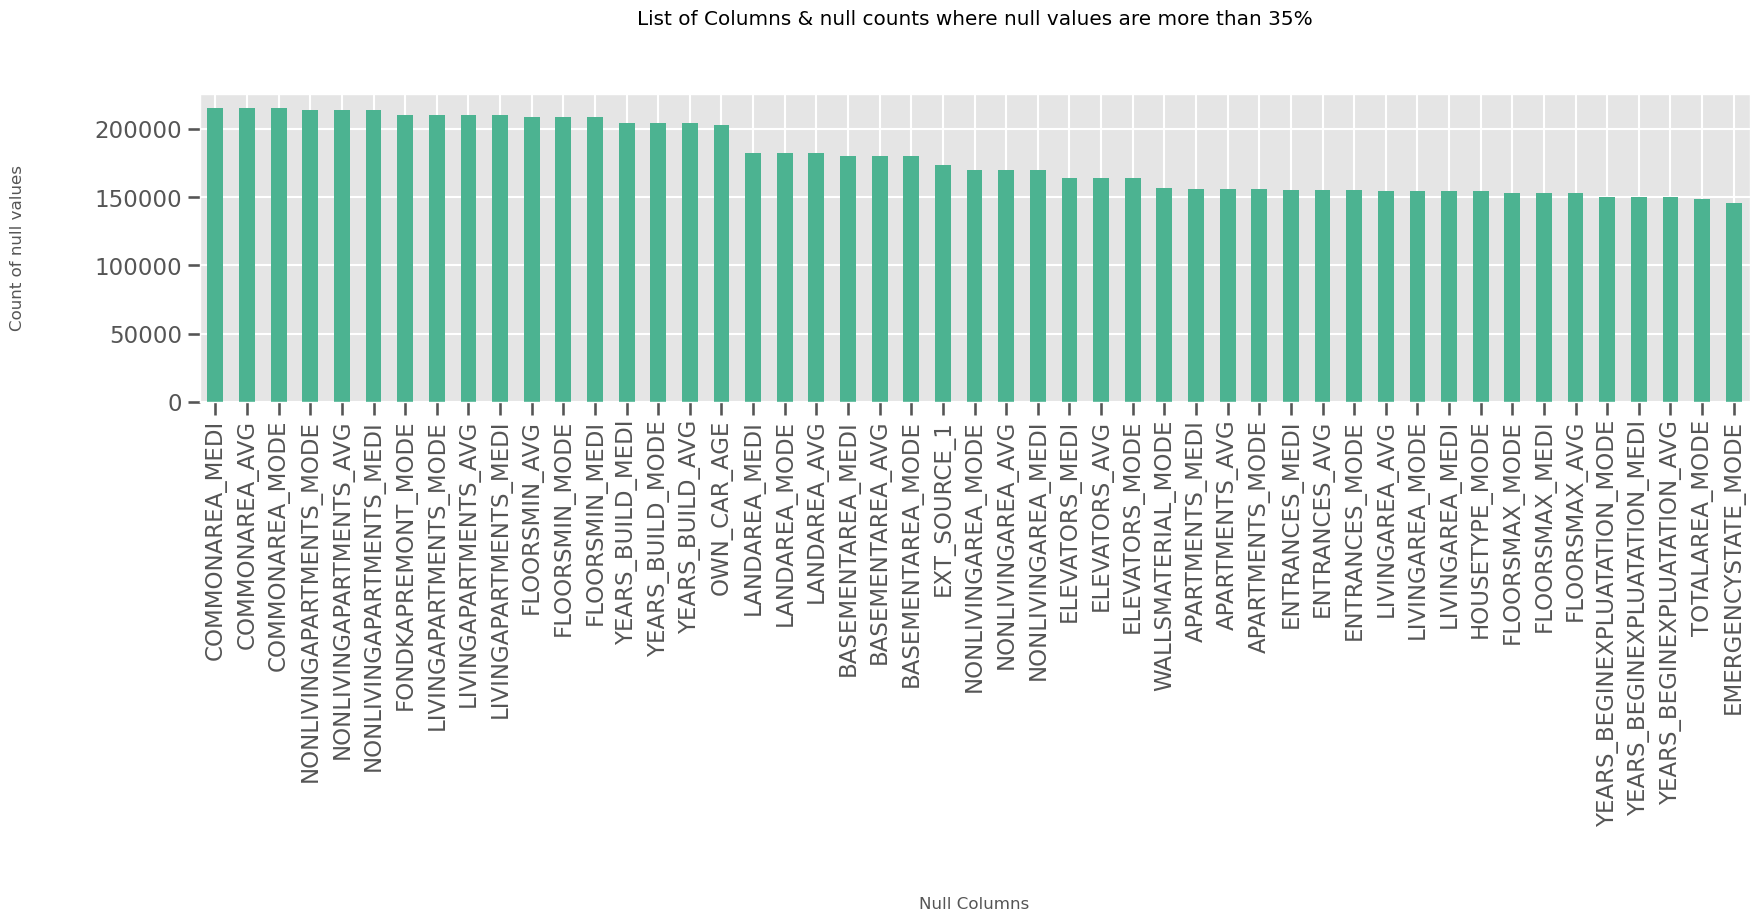

In [78]:
#Plotting Bar Graph for null values greater than 35%

plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="#4CB391")                           
plt.title('List of Columns & null counts where null values are more than 35%') 

plt.xlabel("Null Columns",fontdict={"fontsize":12,"fontweight":5})                  #Setting X-label and Y-label
plt.ylabel("Count of null values",fontdict={"fontsize":12,"fontweight":5})
plt.show()

### Usually 25 to 30% of null values are permitted but when we see the practical data sets that we get mostly the columns have up to 50% of missing values, and based on the clients requirement we need to deal with those. Here we will drop all columns with missing values more then 35%

In [18]:
len(null_col)

49

In [79]:

label = list(null_col.index.values) #Making list of column names having null values greater than 35%
df_credit.drop(labels = label,axis=1,inplace = True) #Droping those columns

In [80]:
label

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [81]:
#Shape of the dataset after removing column with more then 35% null vlaues
df_credit.shape

(307511, 73)

## Checking the percentage of null values again

In [82]:
null = (df_credit.isnull().sum()/len(df_credit)*100).sort_values(ascending = False).head(50)
null.head(30)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


### We can see there are still some null values lets handle them

In [83]:
df_credit.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df_credit.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df_credit.AMT_REQ_CREDIT_BUREAU_MON.fillna(df_credit.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

df_credit.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df_credit.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df_credit.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df_credit.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df_credit.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df_credit.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df_credit.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df_credit.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df_credit.NAME_TYPE_SUITE.fillna(df_credit.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df_credit.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df_credit.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df_credit.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df_credit.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df_credit.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df_credit.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df_credit.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df_credit.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df_credit.CNT_FAM_MEMBERS.fillna(df_credit.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df_credit.DAYS_LAST_PHONE_CHANGE.fillna(df_credit.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df_credit.EXT_SOURCE_2.fillna(df_credit.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

df_credit.EXT_SOURCE_3.fillna(df_credit.EXT_SOURCE_3.median() , inplace = True) #EXT_SOURCE_3

In [84]:
(df_credit.isnull().sum()/len(df_credit)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_3                 0.000000
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
Length: 73, dtype: float64

We didn’t impute OCCUPATION_TYPE because it may contain some useful information, so imputing it with mean or median doesn’t make any sense.

We’ll impute ‘OCCUOATION_TYPE” later by analyzing it.

If you observe the columns carefully, you will find that some columns contain an error. So let’s make some changes.

In [85]:
df_credit[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]]

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

### If you see the data carefully, you will find that though these are days, it contains negative values which is not valid. So let’s make changes accordingly.As you can see all the columns starts with DAYS, let’s make a list of columns we want to change for ease of change.

In [86]:
day_cols = [i for i in df_credit if i.startswith('DAYS')]
day_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

## Applying abs function to columns to convert them to +ive values

In [87]:
df_credit[day_cols]= abs(df_credit[day_cols])

In [88]:
print(df_credit['DAYS_BIRTH'].unique()) 
print(df_credit['DAYS_EMPLOYED'].unique()) 
print(df_credit['DAYS_REGISTRATION'].unique()) 
print(df_credit['DAYS_ID_PUBLISH'].unique()) 
print(df_credit['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [29]:
## Some columns are Y?N type lets convert them to 0/1 type

In [89]:
df_credit['FLAG_OWN_CAR'] = np.where(df_credit['FLAG_OWN_CAR']=='Y', 1 , 0)  
df_credit['FLAG_OWN_REALTY'] = np.where(df_credit['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [90]:
df_credit.shape

(307511, 73)

## Checking the distribution for columns

In [91]:
df_credit.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [33]:
#we get to know that some columns contain ‘XNA’ values which mean null. Let’s impute it accordingly.

In [92]:
# we are imputing the XNA values with F as they are the most frequent ones

df_credit.loc[df_credit.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
df_credit.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

#Similarly checking and imputing organization type
Here we observe that wherever NAME_INCOME_TYPE is Pensioner there only we have null values in ORGANIZATON_TYPE column.Let’s see count of Pensioner and then we’ll decide whether to impute null values of ORGANIZATION_TYPE with Pensioner or not`

In [93]:
df_credit.ORGANIZATION_TYPE.value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [94]:
df_credit.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

## 
* So from these data, we can conclude that Pensioner value is approximately equal to null values in ORGANIZATION_TYPE column. So the value is Missing At Random.

* Similarly imputing null values of OCCUPATION_TYPE with Pensioner as most of the null values for OCCUPATION_TYPE compared to Income type variable values we found that “Pensioner” is the most frequent value almost 80% of the null values of OCCUPATION_TYPE

In [95]:
df_credit['ORGANIZATION_TYPE'] = df_credit['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')
df_credit['OCCUPATION_TYPE'].fillna('Pensioner' , inplace = True)

In [96]:
df_credit.ORGANIZATION_TYPE.value_counts().head()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Pensioner                 55374
Self-employed             38412
Other                     16683
Medicine                  11193
Name: count, dtype: int64

In [39]:
# We have some columns which have nominal categorical values. So let’s impute them accordingly. 

In [97]:
df_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [98]:
df_credit['AMT_INCOME_TYPE'] = pd.qcut(df_credit.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH']) 
df_credit['AMT_INCOME_TYPE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [99]:
#Binning AMT_credit to AMT_CRED_TYPE based on quantiles
df_credit['AMT_CREDIT_TYPE'] = pd.qcut(df_credit.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
df_credit['AMT_CREDIT_TYPE'].head(11)

0           LOW
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5           LOW
6     VERY_HIGH
7     VERY_HIGH
8          HIGH
9           LOW
10       MEDIUM
Name: AMT_CREDIT_TYPE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [100]:
#Let’s Bin ‘DAYS_BIRTH’ column by converting it to years based on various “AGE_GROUP”

df_credit['DAYS_BIRTH']= (df_credit['DAYS_BIRTH']/365).astype(int)    # Converting 
df_credit['DAYS_BIRTH'].unique()
df_credit['AGE_GROUP']=pd.cut(df_credit['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])   #Binning

In [101]:
df_credit[['DAYS_BIRTH','AGE_GROUP']].head()

DAYS_BIRTH   AGE_GROUP
0          25  Very_Young
1          45  Middle_Age
2          52  Middle_Age
3          52  Middle_Age
4          54  Middle_Age

## Again check the datatypes for all the columns and change them accordingly

In [102]:
df_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [103]:
#By checking the data types we found the following columns to change their data types.

df_credit['NAME_CONTRACT_TYPE'] = df_credit['NAME_CONTRACT_TYPE'].astype('category')
df_credit['CODE_GENDER'] = df_credit['CODE_GENDER'].astype('category')
df_credit['NAME_TYPE_SUITE'] = df_credit['NAME_TYPE_SUITE'].astype('category')
df_credit['NAME_INCOME_TYPE'] = df_credit['NAME_INCOME_TYPE'].astype('category')
df_credit['NAME_EDUCATION_TYPE'] = df_credit['NAME_EDUCATION_TYPE'].astype('category')
df_credit['NAME_FAMILY_STATUS'] = df_credit['NAME_FAMILY_STATUS'].astype('category')
df_credit['NAME_HOUSING_TYPE'] = df_credit['NAME_HOUSING_TYPE'].astype('category')
df_credit['OCCUPATION_TYPE'] = df_credit['OCCUPATION_TYPE'].astype('category')
df_credit['WEEKDAY_APPR_PROCESS_START'] = df_credit['WEEKDAY_APPR_PROCESS_START'].astype('category')
df_credit['ORGANIZATION_TYPE'] = df_credit['ORGANIZATION_TYPE'].astype('category')

In [104]:
#Removing columns not adding any value

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']



In [105]:
unwanted

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [106]:
df_credit.drop(labels=unwanted,axis=1,inplace=True)

In [107]:
df_credit.shape

(307511, 48)

In [108]:
df_credit.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_

## Outlier Analysis

Outlier detection for any data science process is very important. Sometimes removing outliers tend to improve our model meanwhile sometimes outliers may give you a very different approach to your analysis.

So let’s make a list of all the numeric columns and plot boxplots to understand the outliers in the data.

In [109]:
numerical_col = df_credit.select_dtypes(include='number').columns
len(numerical_col)

35

C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\1953687440.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


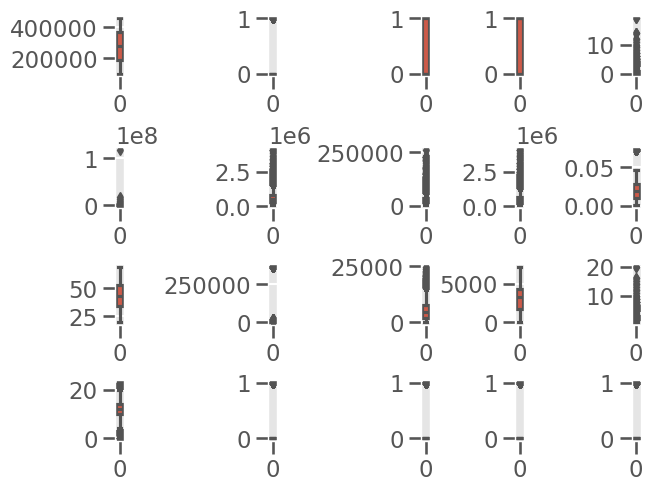

In [110]:
fig , axes = plt.subplots(nrows=4, ncols=5, constrained_layout=True)                 # Plot Configuration 
fig.subplots_adjust(left= 0, bottom=0, right=3, top=12, wspace=0.09, hspace=0.3)


for ax, column in zip(axes.flatten(),numerical_col):        #Using For loop 

    sns.boxplot(df_credit[column],ax=ax)   #Ploting

Insights

CNT_CHILDREN have outlier values having children more than 5.
IQR for AMT_INCOME_TOTAL is very slim and it has a large number of outliers.
Third quartile of AMT_CREDIT is larger as compared to the First quartile which means that most of the Credit amount of the loan of customers are present in the third quartile. And there are a large number of outliers present in AMT_CREDIT.
The third quartile AMT_ANNUITY is slightly larger than the First quartile and there is a large number of outliers.
Third quartile of AMT_GOODS_PRICE,DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE is larger as compared to the First quartile and all have a large number of outliers.
IQR for DAYS EMPLOYED is very slim. Most of the outliers are present below 25000. And an outlier is present 375000.
From boxplot of CNT_FAM_MEMBERS , we can say that most of the clients have 4 family members. There are some outliers present.
DAYS_BIRTH ,DAYS_ID_PUBLISH and EXT_SOURCE_2,EXT_SOURCE_3 don’t have any outliers.
Boxplot for DAYS_EMPLOYED ,OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT and AMT_REQ_CREDIT_BUREAU_YEARare very slim and have a large number of outliers.
FLAG_OWN_CAR : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that most of the clients own a car
FLAG_OWN_REALTY : It doesn’t have First and Third quantile and values lies within IQR, So we can conclude that  most of the clients own a House/Flat


Before we start analysing our data, let’s check the data imbalance. It’s a very important to step in any machine learning or deep learning process.

In [111]:
Target0 = df_credit.loc[df_credit["TARGET"]==0]
Target1 = df_credit.loc[df_credit["TARGET"]==1]

### Calculate Imbalance percentage

In [112]:
round(len(Target0)/len(Target1),2)

11.39

The Imbalance ratio we got  is "11.39"

Let’s check the distribution of the target variable visually using a pie chart.

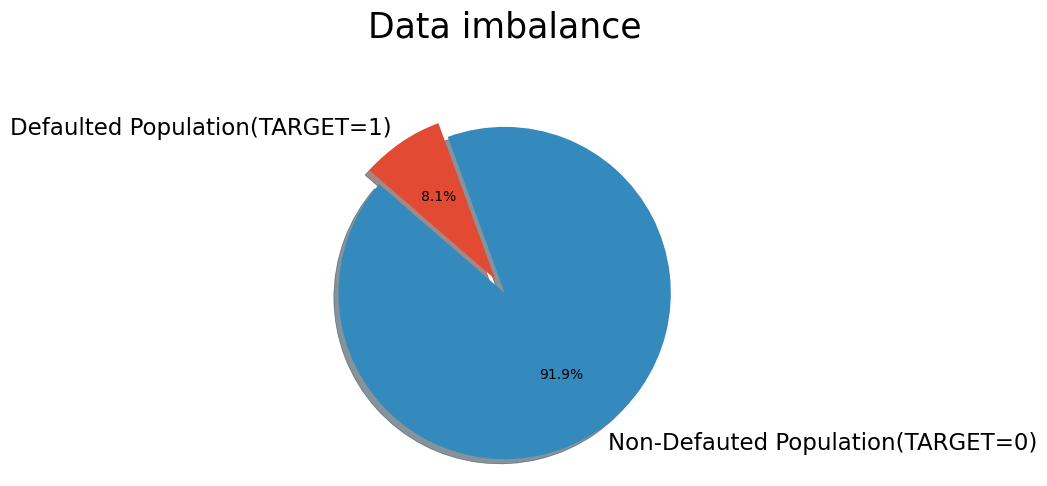

In [113]:
count1 = 0 
count0 = 0
for i in df_credit['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df_credit['TARGET']))*100
count0 = (count0/len(df_credit['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()


## Insights
Df_credit dataframe that is application data is highly imbalanced. Defaulted population is 8.1 % and non- defaulted population is 91.9% .Ratio is 11.3


We will separately analyse the data based on the target variable for a better understanding.



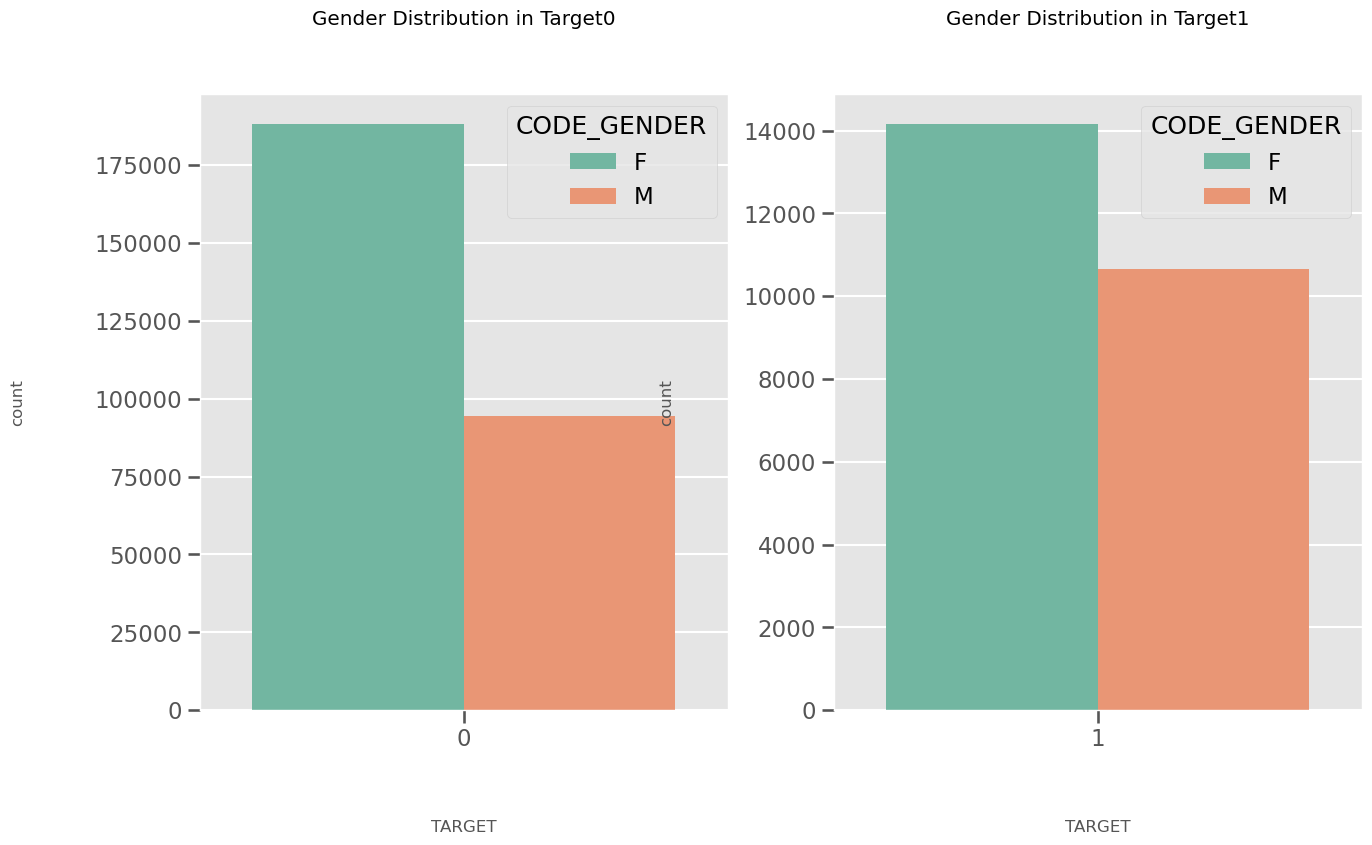

In [114]:
plt.figure(figsize=(15,8))
plt.subplot(121)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target0, palette = 'Set2')
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',hue='CODE_GENDER',data=Target1, palette = 'Set2')
plt.title("Gender Distribution in Target1")

plt.show()

## Insights
It seems like Female clients applied higher than male clients for loan
66.6% Female clients are non-defaulters while 33.4% male clients are non-defaulters.
57% Female clients are defaulters while 42% male clients are defaulters.


## Age distribution based on target 0 and target 1

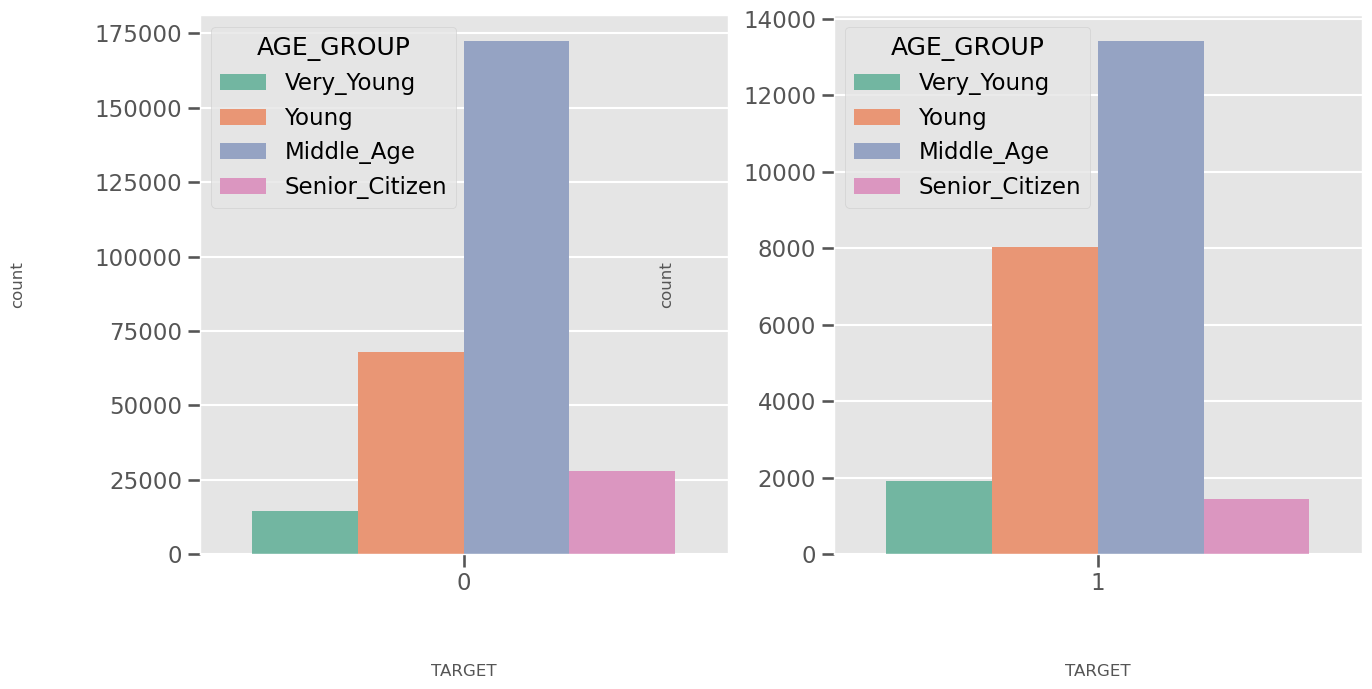

In [116]:
plt.figure(figsize=(15,7)) 
plt.subplot(121)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target0,palette='Set2')
plt.subplot(122)
sns.countplot(x='TARGET',hue='AGE_GROUP',data=Target1,palette='Set2')
plt.show()

## Insights
Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters.
Also, Middle Age group facing paying difficulties the most.
While Senior Citizens(60-100) and Very young(19-25) age group facing paying difficulties less as compared to other age groups.


Organization’s  Distribution Based on Target 0 and Target 1

<Figure size 4000x500 with 0 Axes>

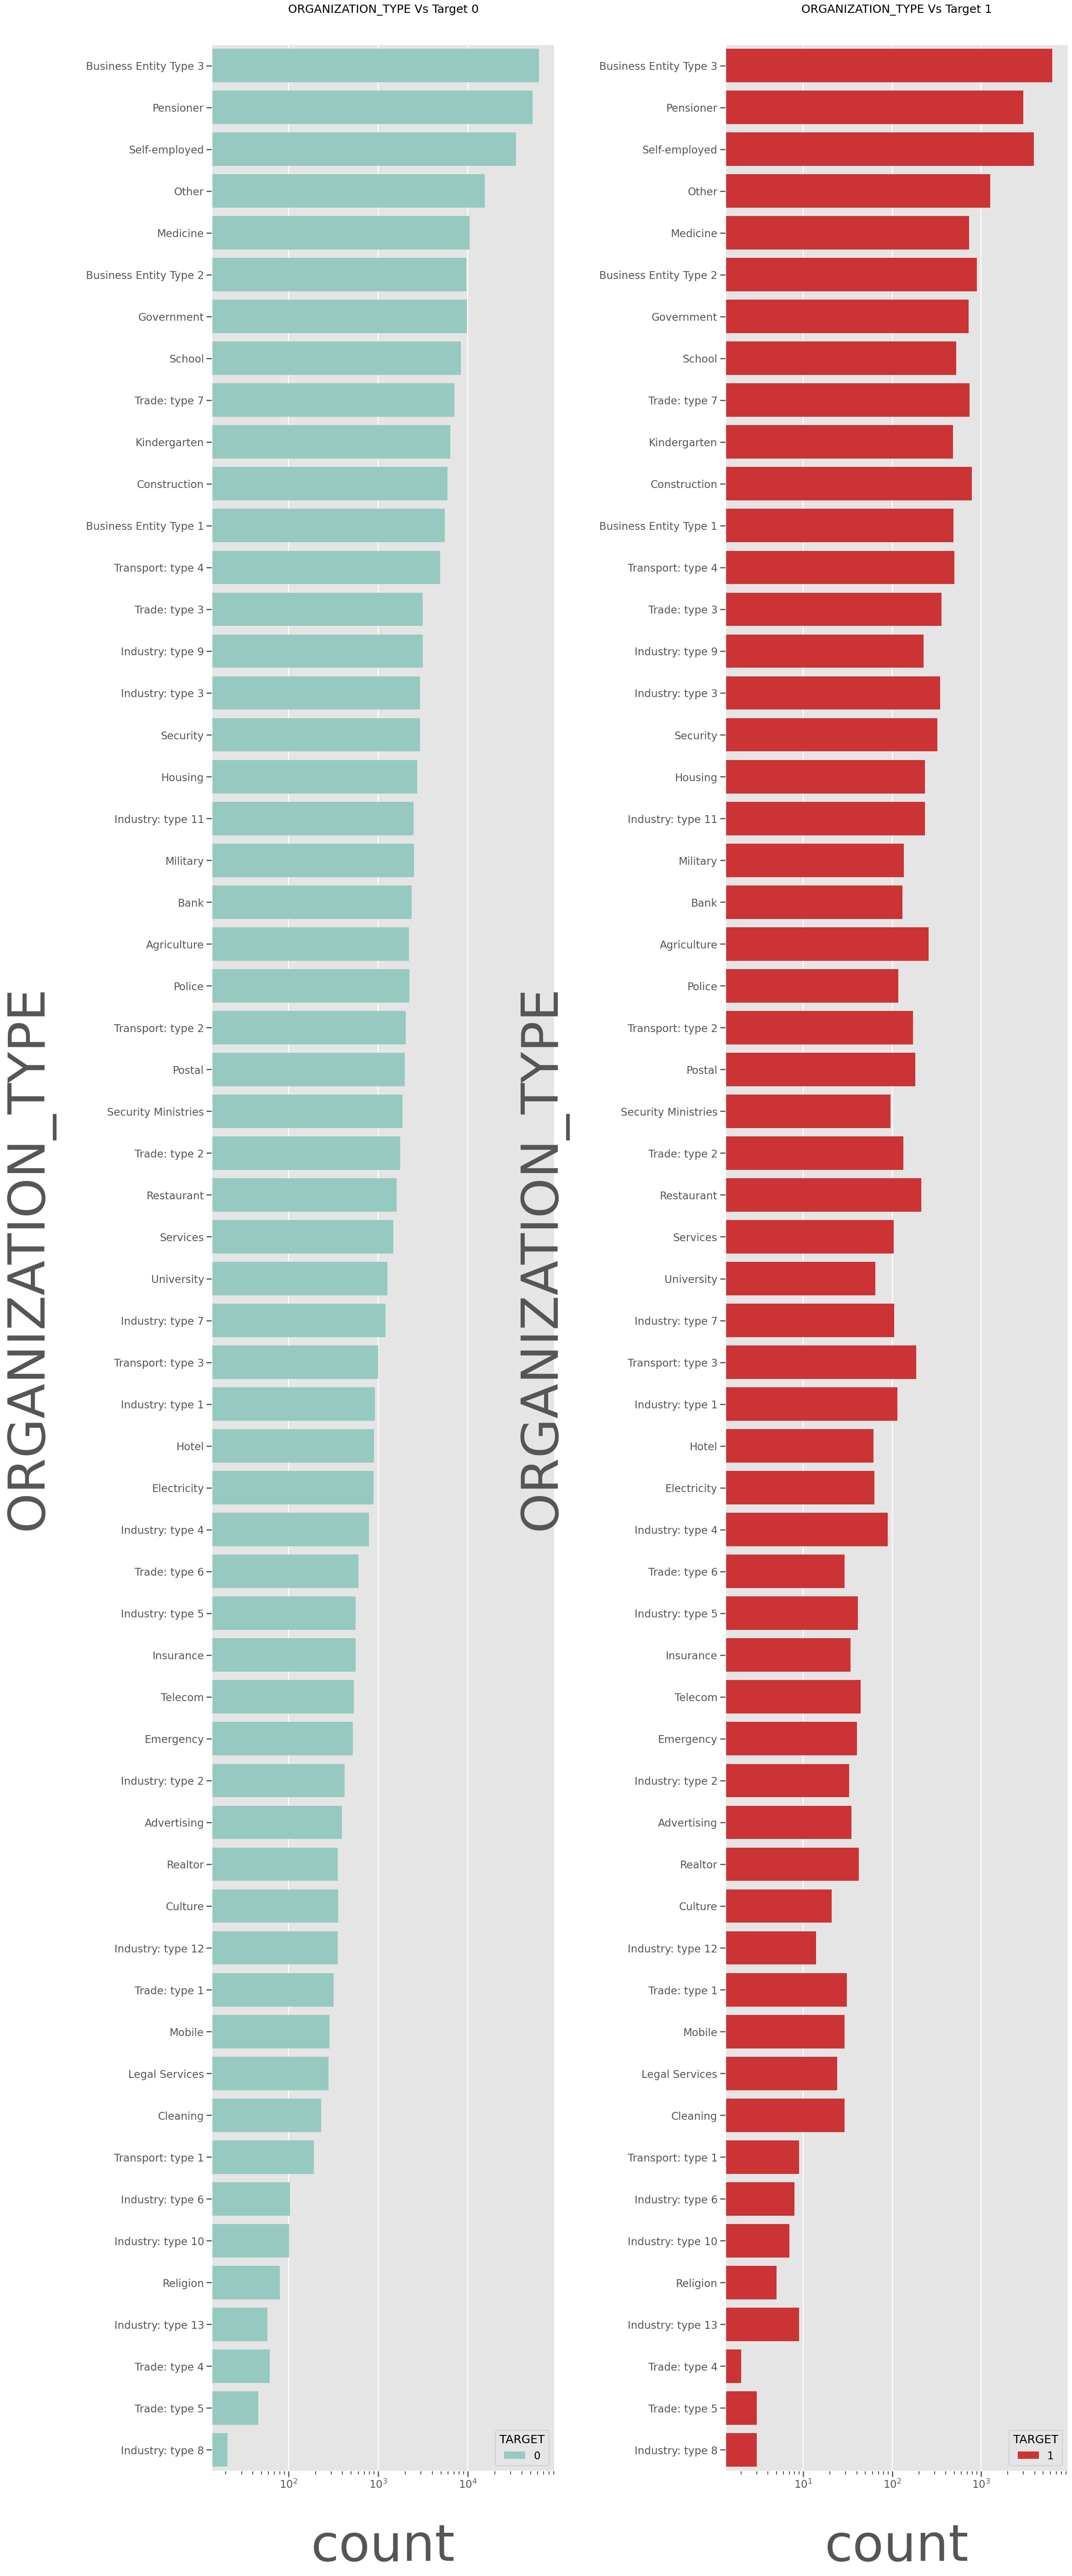

In [117]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 80
plt.rcParams['axes.titlesize'] = 80                                                           # Plot Configuration 
plt.rcParams['axes.titlepad'] = 50
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df_credit['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df_credit['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

## Insights

(Defaulters as well as Non-defaulters) Clients with ORGANIZATION_TYPE Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2 applied the most for the loan as compared to others
(Defaulters as well as Non-defaulters) Clients having ORGANIZATION_TYPE Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8 applied lower for the loan as compared to others.


Creating a plot for each feature manually becomes a too tedious task. So we will define a function and use a loop to iterate through each categorical column.

In [118]:
def categorical_plot(var):
    
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

In [119]:
#Let’s create a list for all categorical columns.

categorical_col = list(df_credit.select_dtypes(include= 'category').columns) 


# Removing 'ORGANIZATION_TYPE','CODE_GENDER','AGE_GROUP' because we have already taken up the isights from  above plots

categorical_col.remove('ORGANIZATION_TYPE') 
categorical_col.remove('CODE_GENDER')
categorical_col.remove('AGE_GROUP')

categorical_col #Checking after removing columns

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_INCOME_TYPE',
 'AMT_CREDIT_TYPE']

In [151]:
# for cat in categorical_col:
#     print(cat)
#     categorical_plot(cat)

## Insights
1.	NAME_CONTRACT_TYPE :

o	Most of the clients have applied for Cash Loan while very small proportion have applied for Revolving loan for both Defaulters as well as Non-defaulters.
2.	NAME_TYPE_SUIT :

o	Most of the clients were accompanied while applying for the loan.And with few clients a family member was accompanying for both Defaulters and Non-Defaulters.
o	But who was accompanying client while applying for the loan doesn’t impact on the default.Also both the populations have same proportions.
3.	NAME_INCOME_TYPE:

o	Clients who applied for loans were getting income by Working,Commercial associate and Pensioner are more likely to apply for the loan, highest being the Working class category .
o	Businessman, students and Unemployedless likely to apply for loan .
o	Working category have high risk to default.
o	State Servant is at Minimal risk to default.
4.	NAME_EDUCATION_TYPE:

o	Clients having education Secondary or Secondary Special are more likey to apply for the loan.
o	Clients having education Secondary or Secondary Special have higher risk to default.Other education types have minimal risk.
5.	NAME_FAMILY_STATUS :

o	Married Clients seems to be applied most for the loan compared to others for both Defaulters and Non-Defaulters.
o	In case of Defaulters,Clients having single relationship are less risky
o	In case of Defaulters, Widows shows Minimal risk.
6.	NAME_HOUSING_TYPE:

o	From the bar chart, it is clear that Most of the clients own a house or living in a apartment for both Defaulters and Non-Defaulters.
7.	OCCUPATION_TYPE:

o	Pensioners have applied the most for the loan in case of Defaulters and Non-Defaulters.
o	Pensioner being highest followed by laborers have high risk to default.
8.	WEEKDAY_APPR_PROCESS_START:

o	There is no considerable difference in days for both Defaulters and Non-defaulters.
9.	AMT_INCOME_TYPE:

o	Clients having Medium salary range are more likely to apply for the loan for both Defaulters and Non-defaulters.
o	Clients having lowandmedium income are at high risk to default.
10.	AMT_CREDIT_TYPE:

o	Most of the clients applied for Medium Credit Amount of the loan for both Defaulters and Non-defaulters.
o	Clients applying for high and low credit are at high risk of default


## Univariate Analysis of Numerical Columns W.R.T Target Variable

In [121]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();

C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


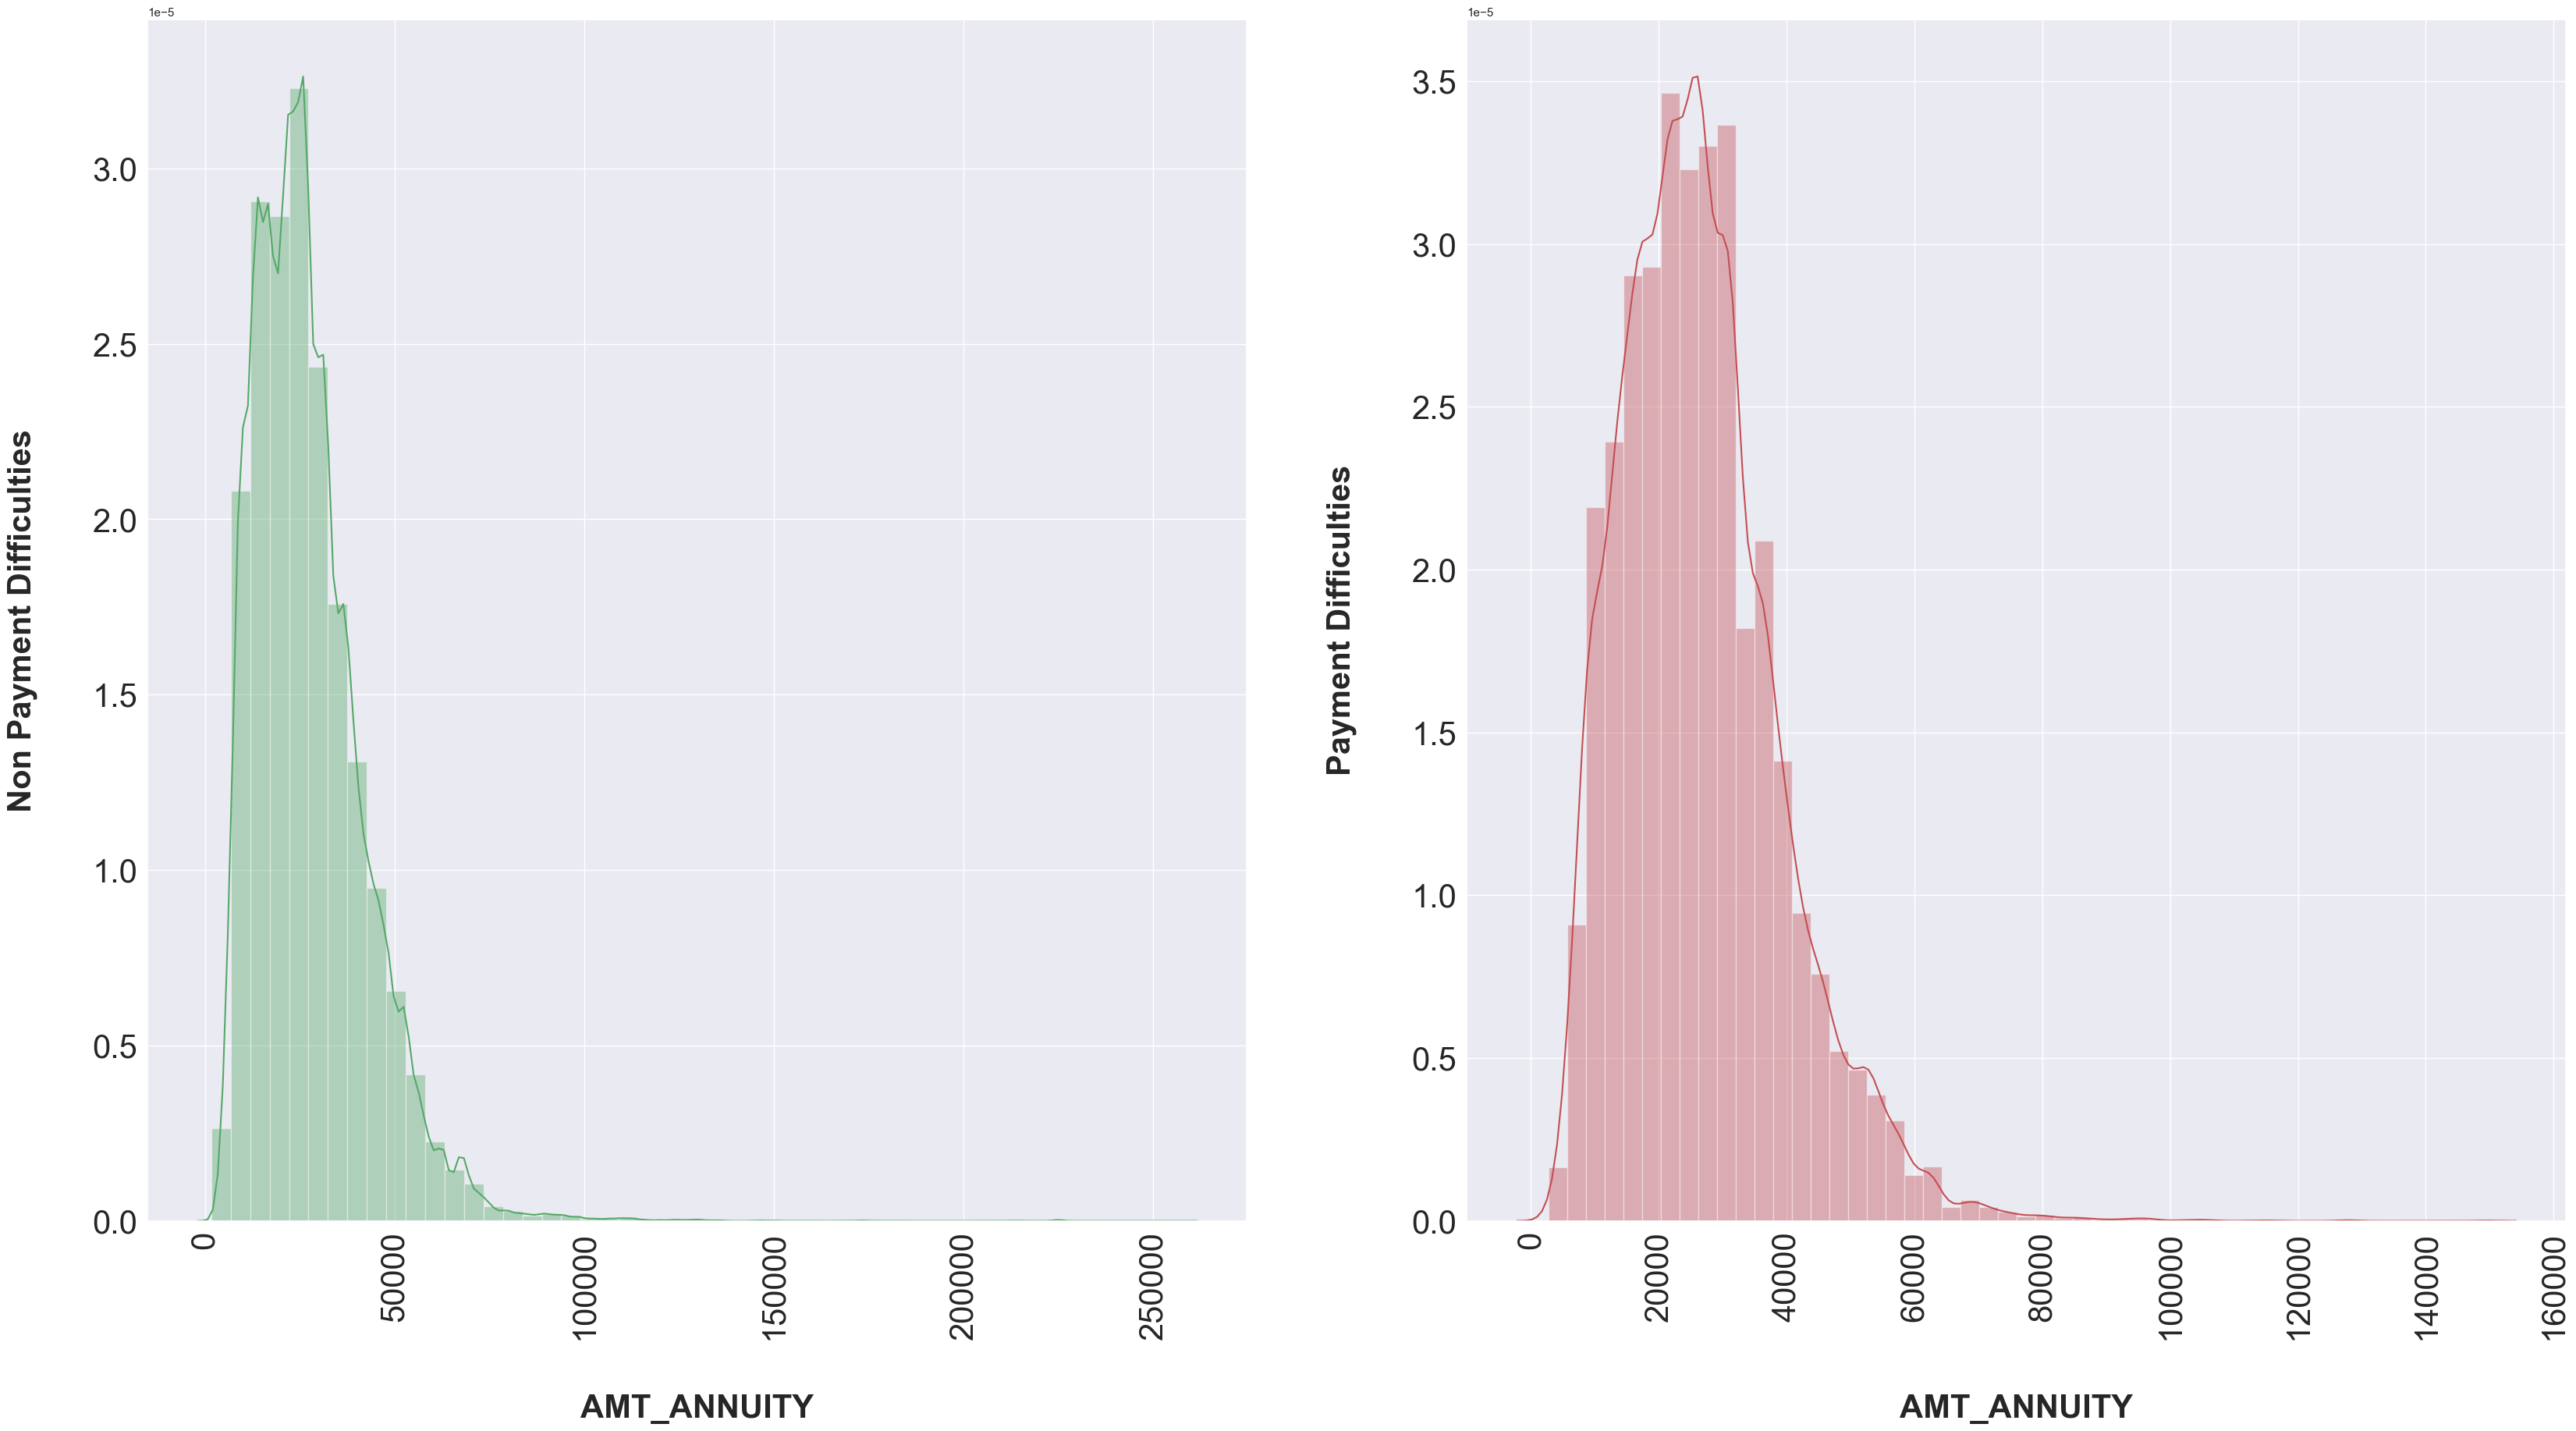

In [122]:
uni(col='AMT_ANNUITY')

C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


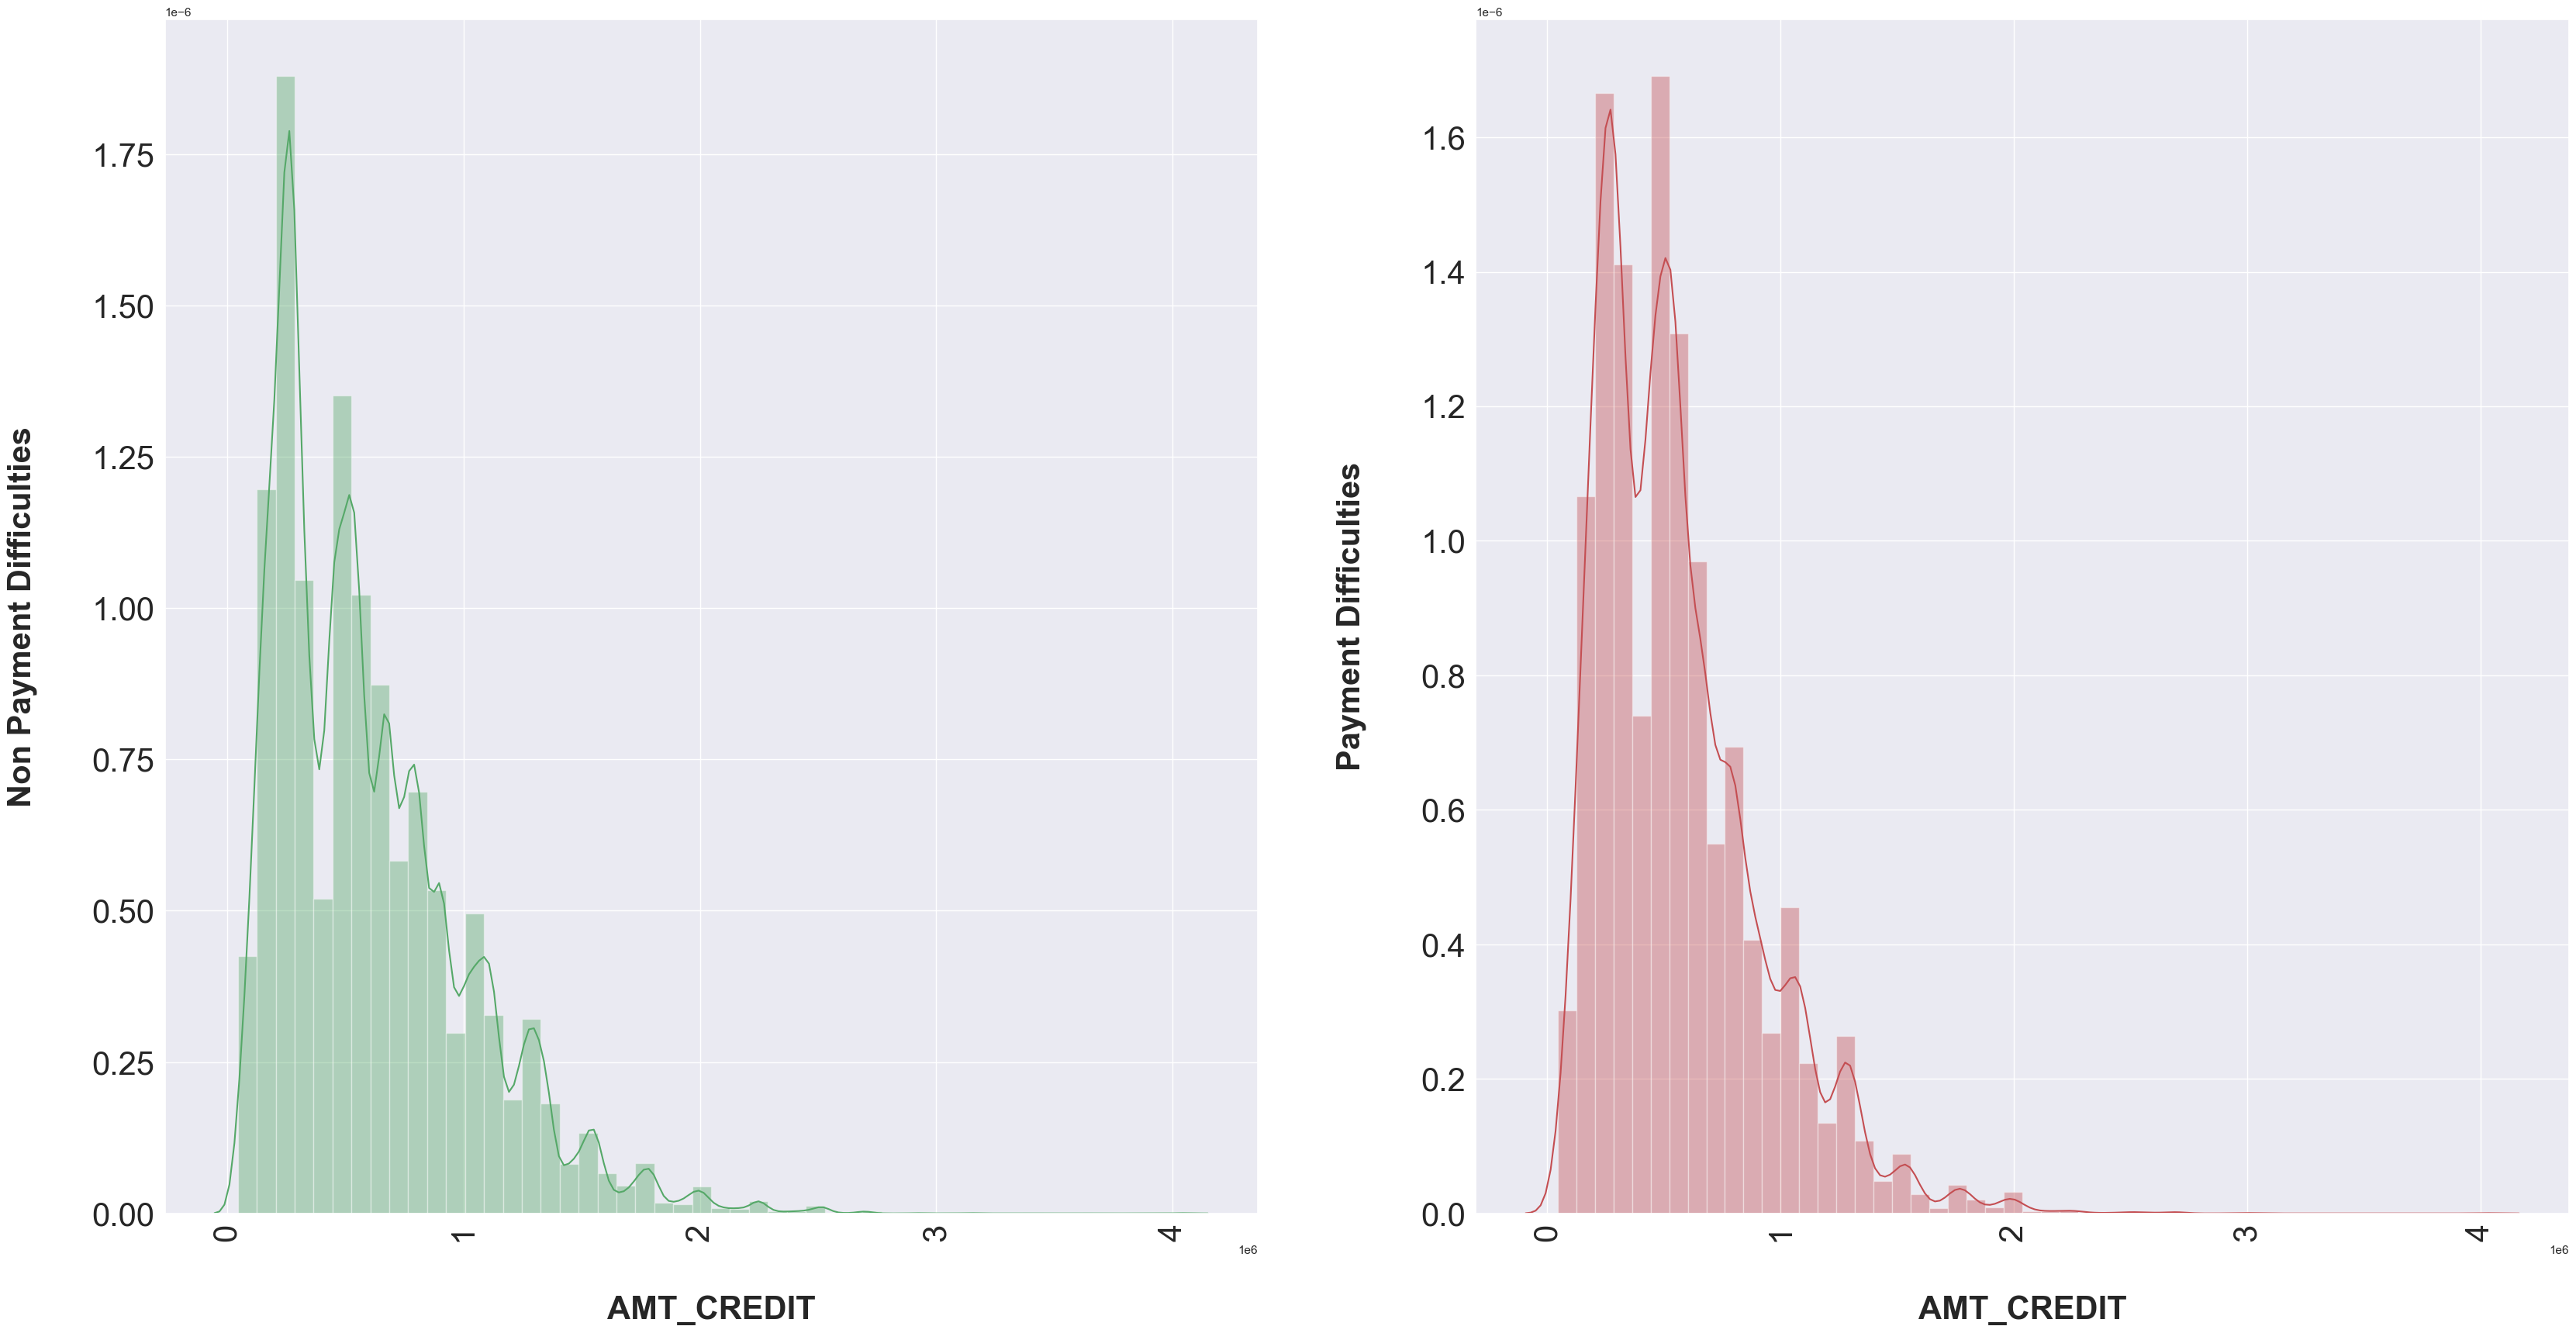

In [123]:
uni(col='AMT_CREDIT')

C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


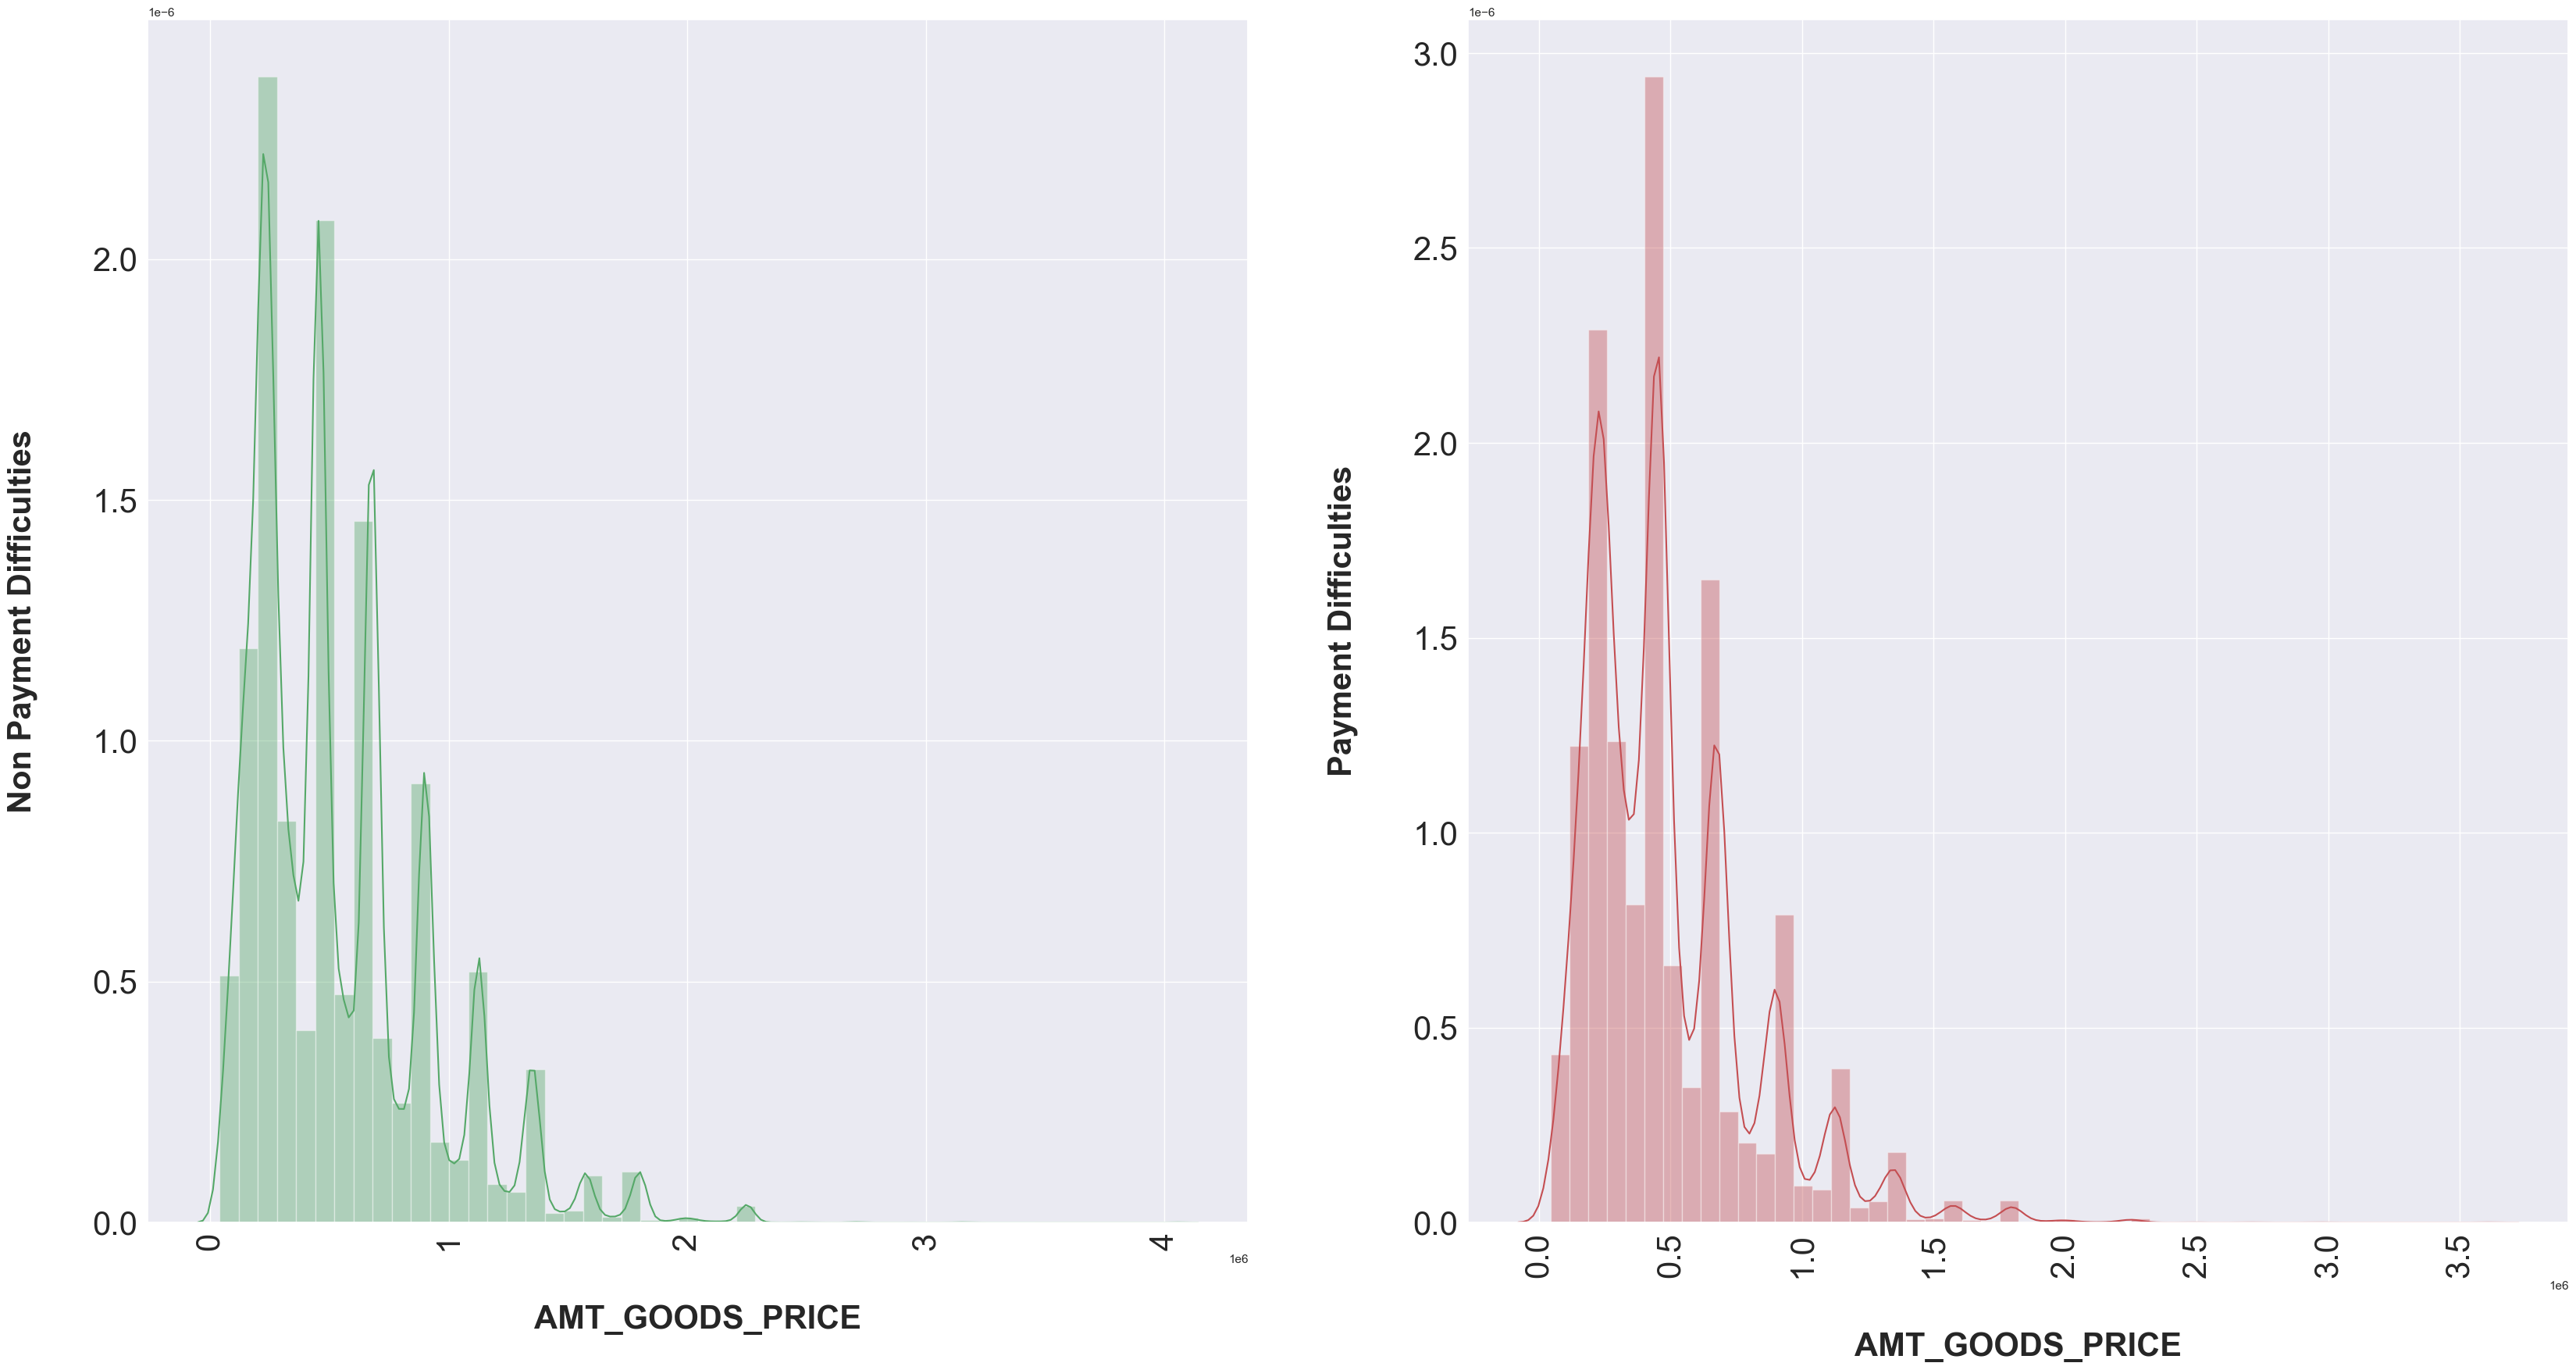

In [124]:
uni(col='AMT_GOODS_PRICE')

C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target0[col], color="g" )
C:\Users\TAHA RAZVI\AppData\Local\Temp\ipykernel_9052\770334251.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Target1[col], color="r")


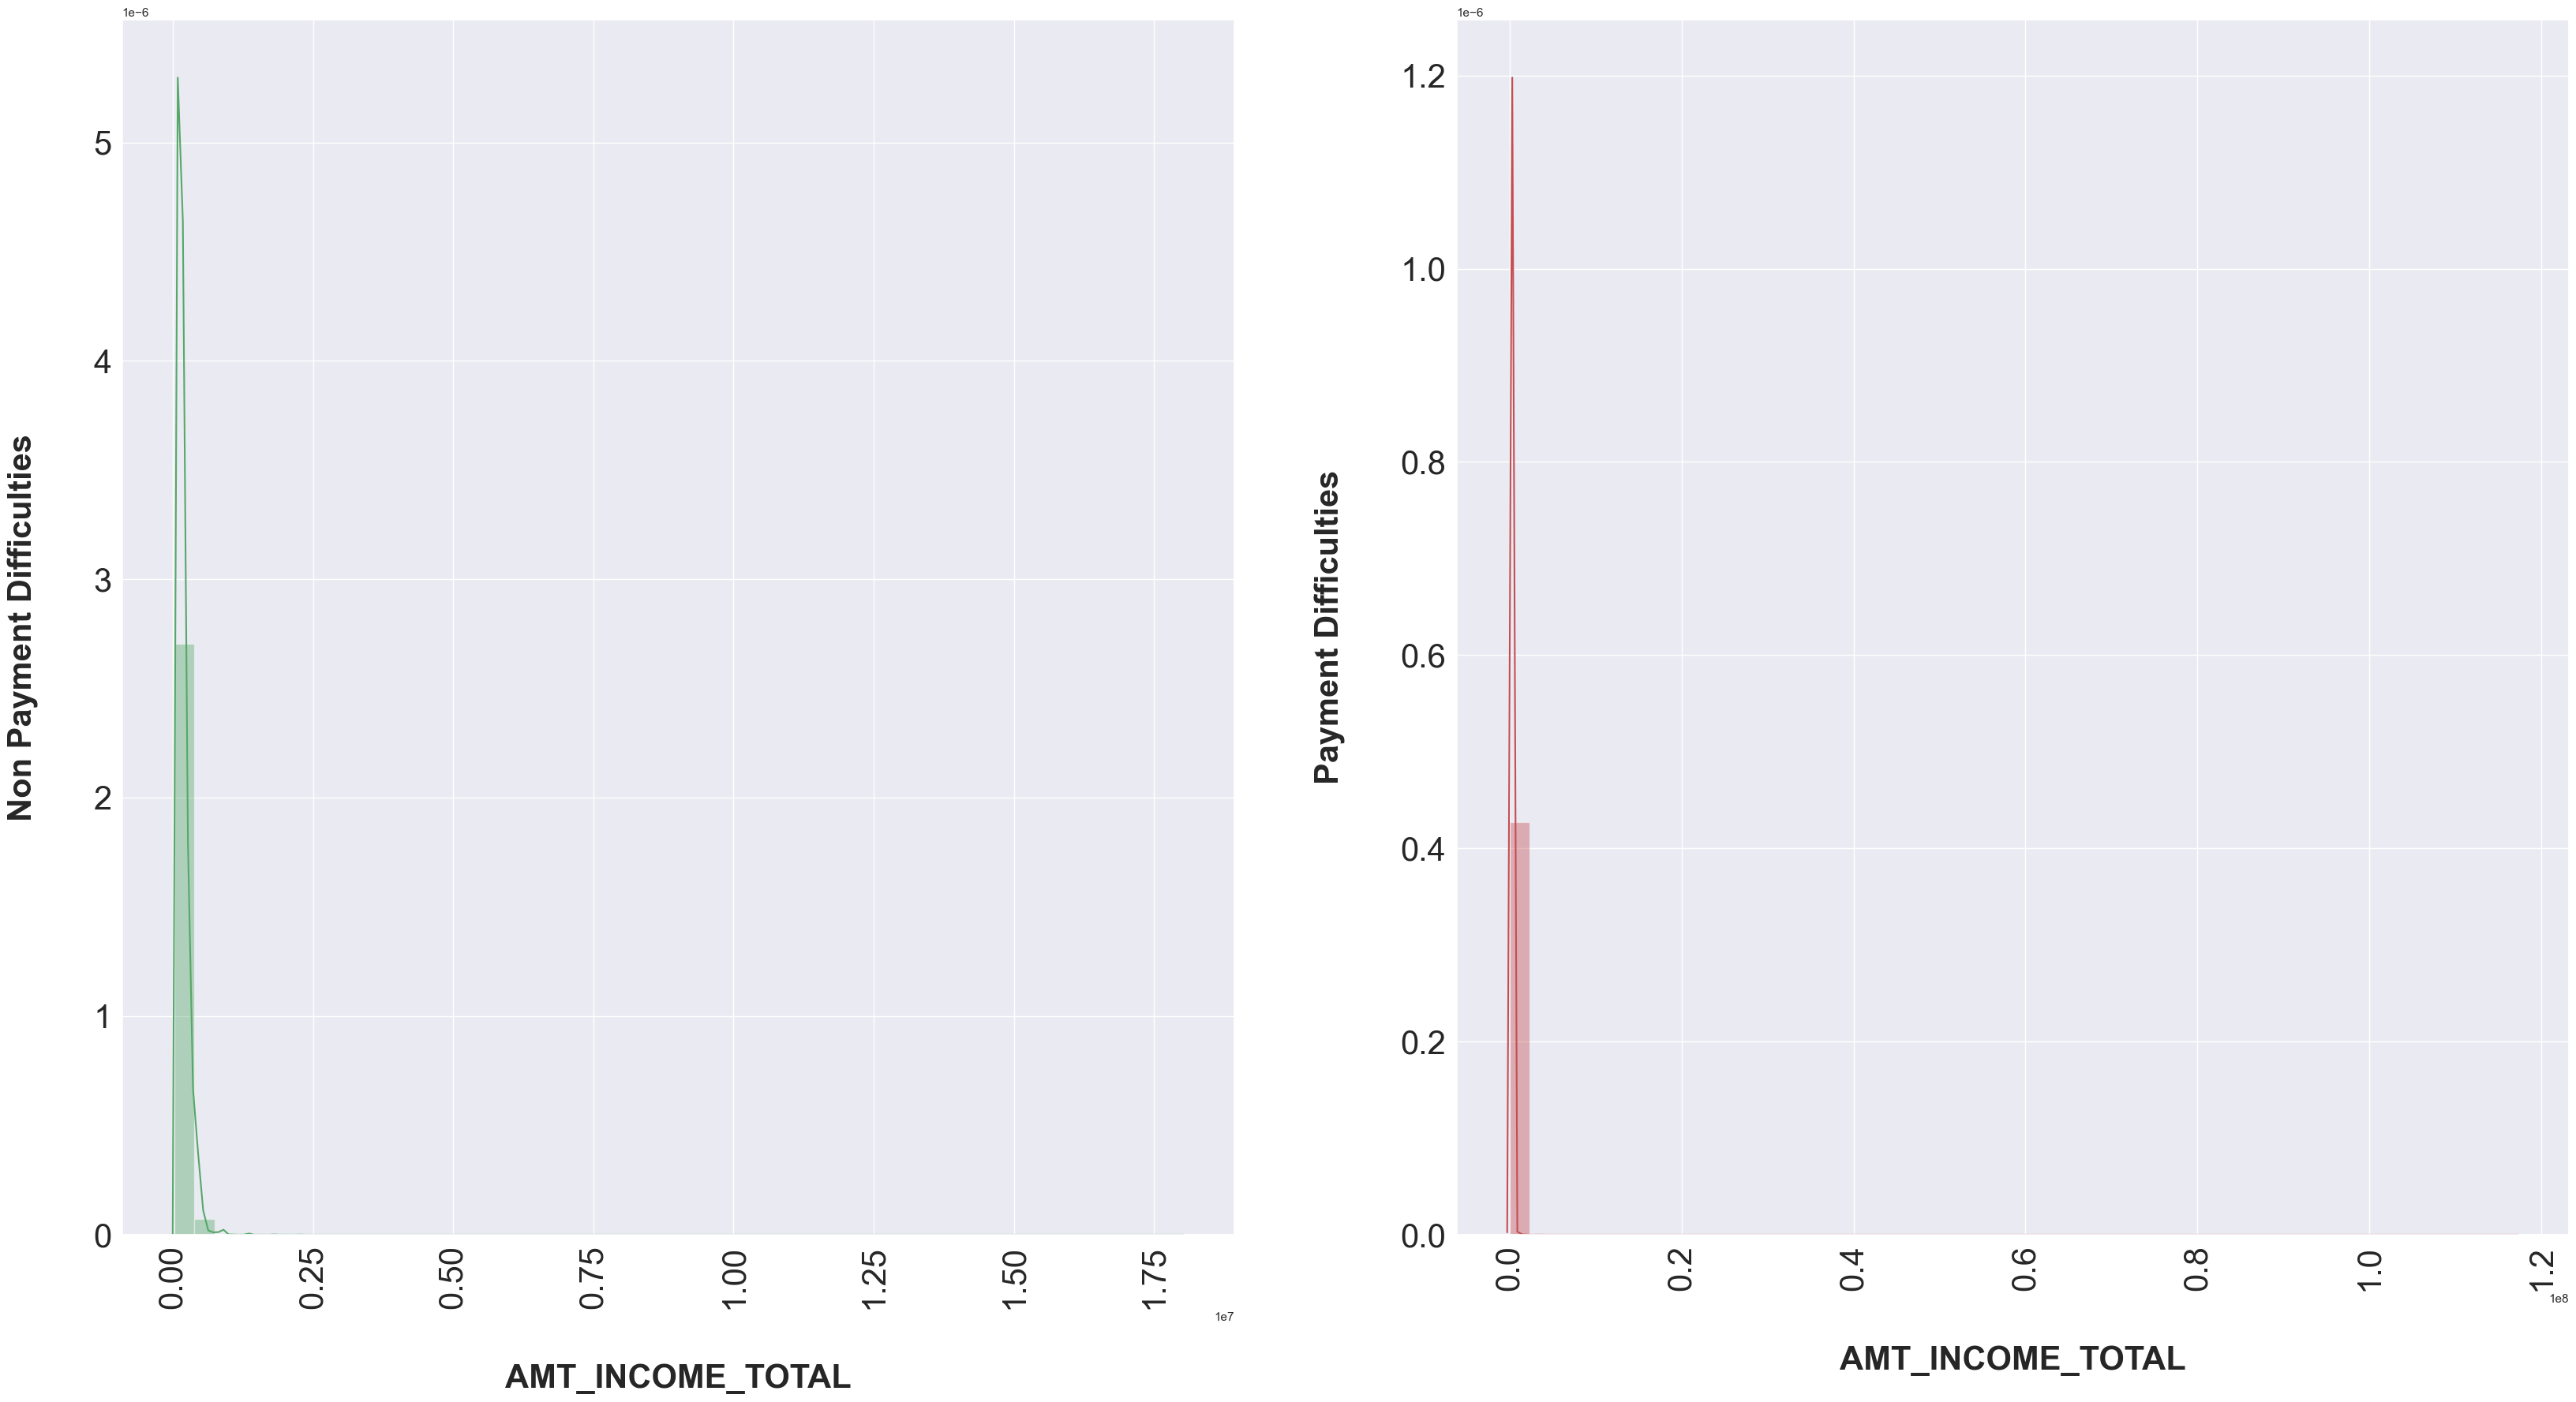

In [125]:
uni(col='AMT_INCOME_TOTAL')

## Insights
Insights
•	People with target one has largely staggered income as compared to target zero. Dist. plot clearly shows that the shape in Income total, Annuity, Credit and Good Price is similar for Target 0 and similar for Target 1.
•	The plots are also highlighting that people who have difficulty in paying back loans with respect to their income, loan amount, price of goods against which loan is procured and Annuity.
•	Dist. plot highlights the curve shape which is wider for Target 1 in comparison to Target 0 which is narrower with well-defined edges.


## Bivariate Analysis: Numerical & Categorical W.R.T Target variables

In [126]:
df_credit[["TARGET","AMT_INCOME_TOTAL","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS"]]

TARGET  AMT_INCOME_TOTAL            NAME_EDUCATION_TYPE  \
0            1          202500.0  Secondary / secondary special   
1            0          270000.0               Higher education   
2            0           67500.0  Secondary / secondary special   
3            0          135000.0  Secondary / secondary special   
4            0          121500.0  Secondary / secondary special   
...        ...               ...                            ...   
307506       0          157500.0  Secondary / secondary special   
307507       0           72000.0  Secondary / secondary special   
307508       0          153000.0               Higher education   
307509       1          171000.0  Secondary / secondary special   
307510       0          157500.0               Higher education   

          NAME_FAMILY_STATUS  
0       Single / not married  
1                    Married  
2       Single / not married  
3             Civil marriage  
4       Single / not married  
...                      ...  
307506             Separated  
307507                 Widow  
307508             Separated  
307509               Married  
307510               Married  

[307511 rows x 4 columns]

## For Target 0



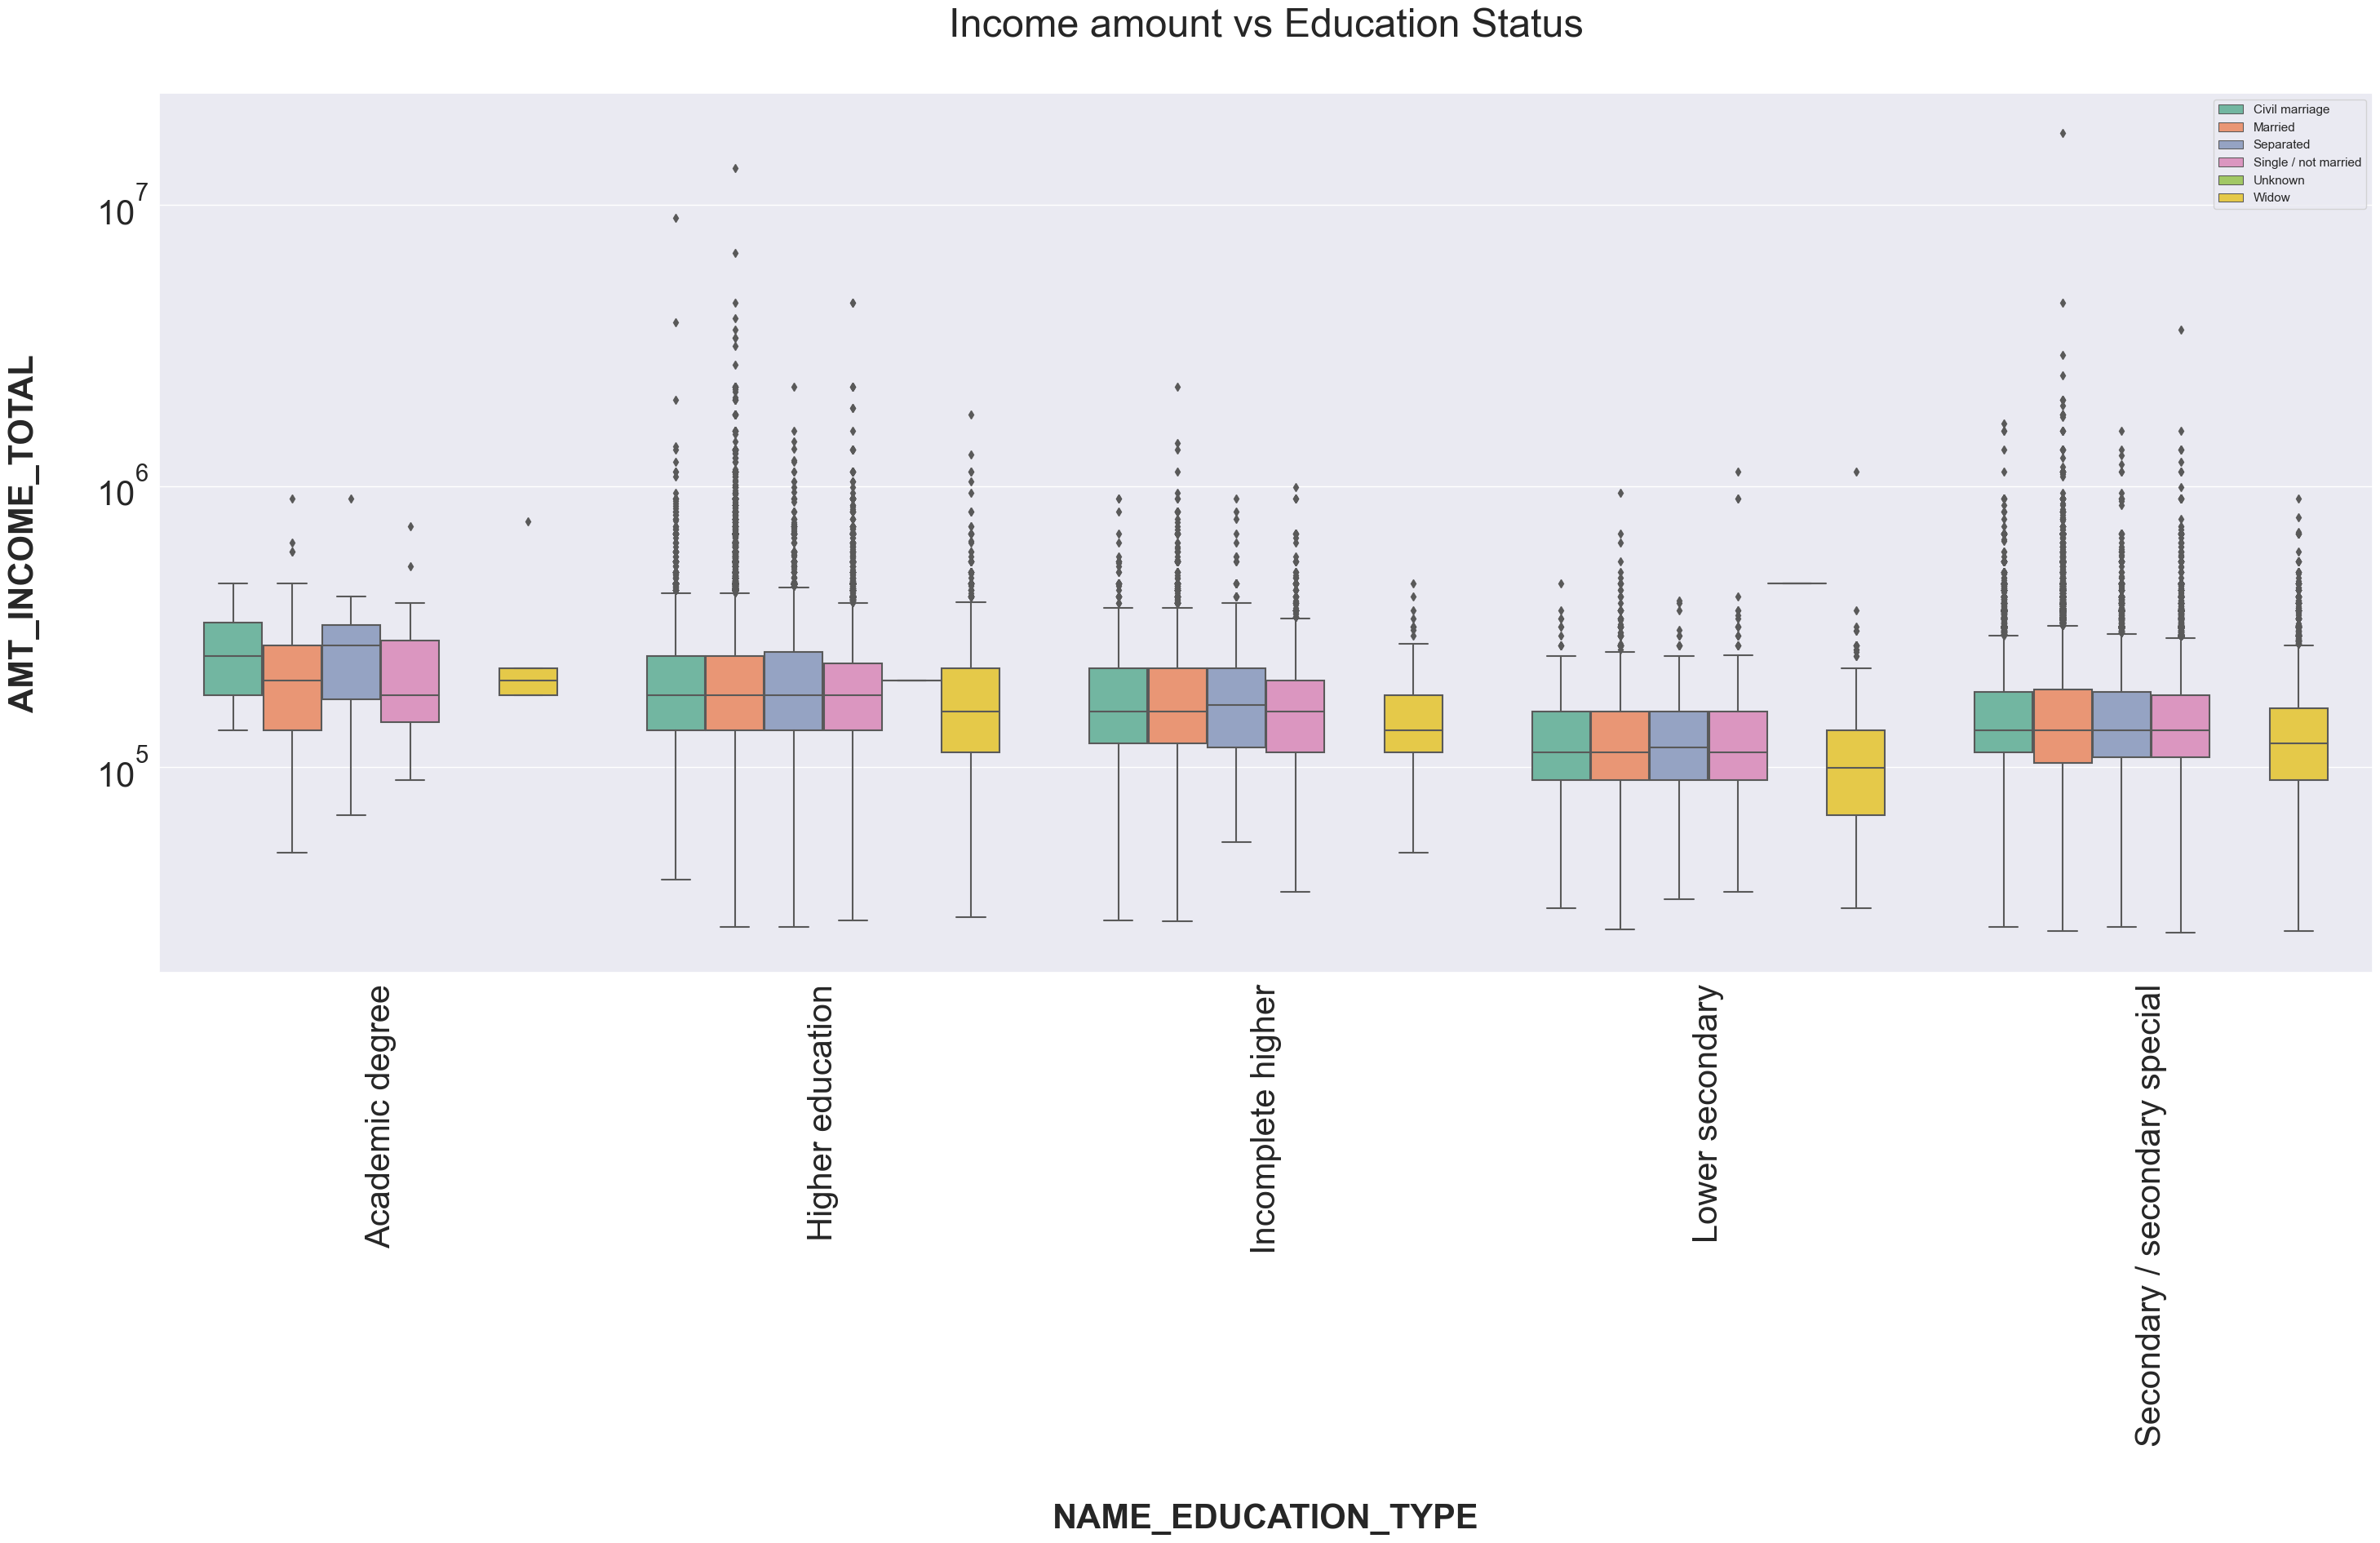

In [127]:
plt.figure(figsize=(35,14)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

## Insights

Widow Client with Academic degree have very few outliers and doesn’t have First and Third quartile. Also, Clients with all types of family statuses having academic degrees have very less outliers as compared to other types of education.
Income of the clients with all types of family status having rest of the education type lie Below the First quartile i.e. 25%
Clients having Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special have a higher number of outliers.
From the above figure, we can say that some of the clients having Higher Education tend to have the highest income compared to others.
Though some of the clients who haven’t completed their Higher Education tend to have higher incomes.
Some of the clients having Secondary/Secondary Special Education tend to have higher incomes.

(array([1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08]),
 [Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 100000.0, '$\\mathdefault{10^{5}}$'),
  Text(0, 1000000.0, '$\\mathdefault{10^{6}}$'),
  Text(0, 10000000.0, '$\\mathdefault{10^{7}}$'),
  Text(0, 100000000.0, '$\\mathdefault{10^{8}}$')])

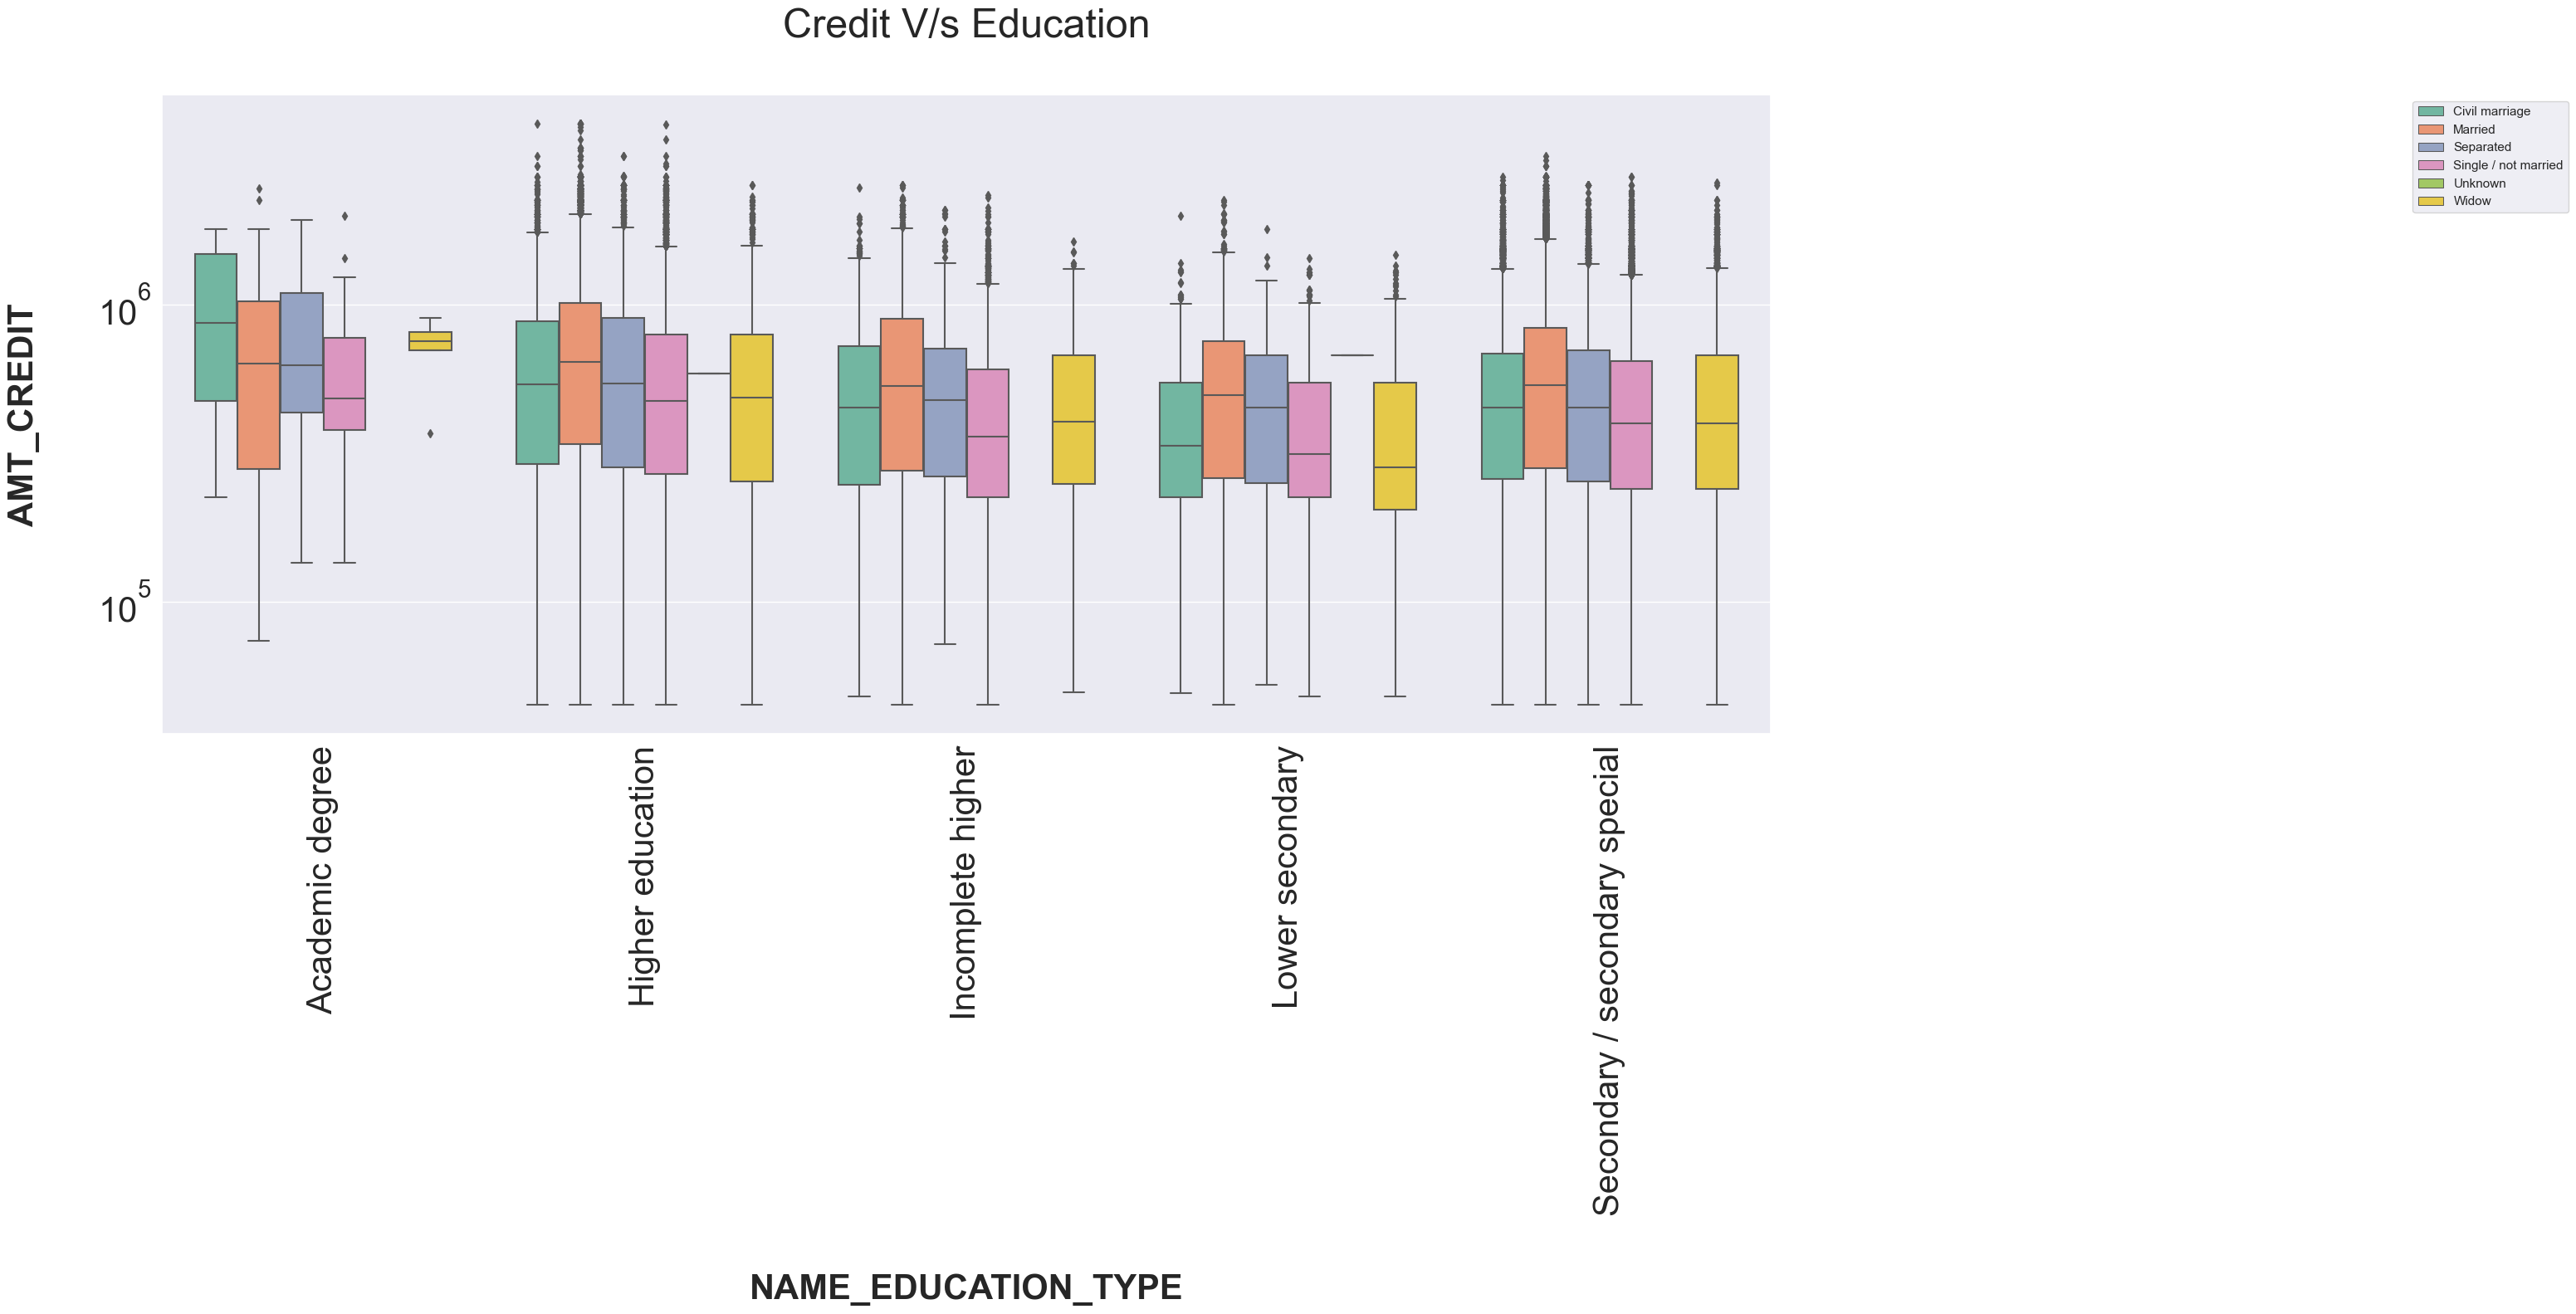

In [128]:
plt.figure(figsize=(25,10))
plt.yscale('log')                      #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',           #Boxplot w.r.t Data Target 0
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')            #Adjusting legend position
plt.title('Credit V/s Education',fontsize=35 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)


## Insights

Clients with different Education types except Academic degrees have a large number of outliers**
Most of the population i.e. clients’ credit amounts lie below 25%.
Clients with an Academic degree and who is a widow tend to take higher credit loan.**
Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.

## For target1



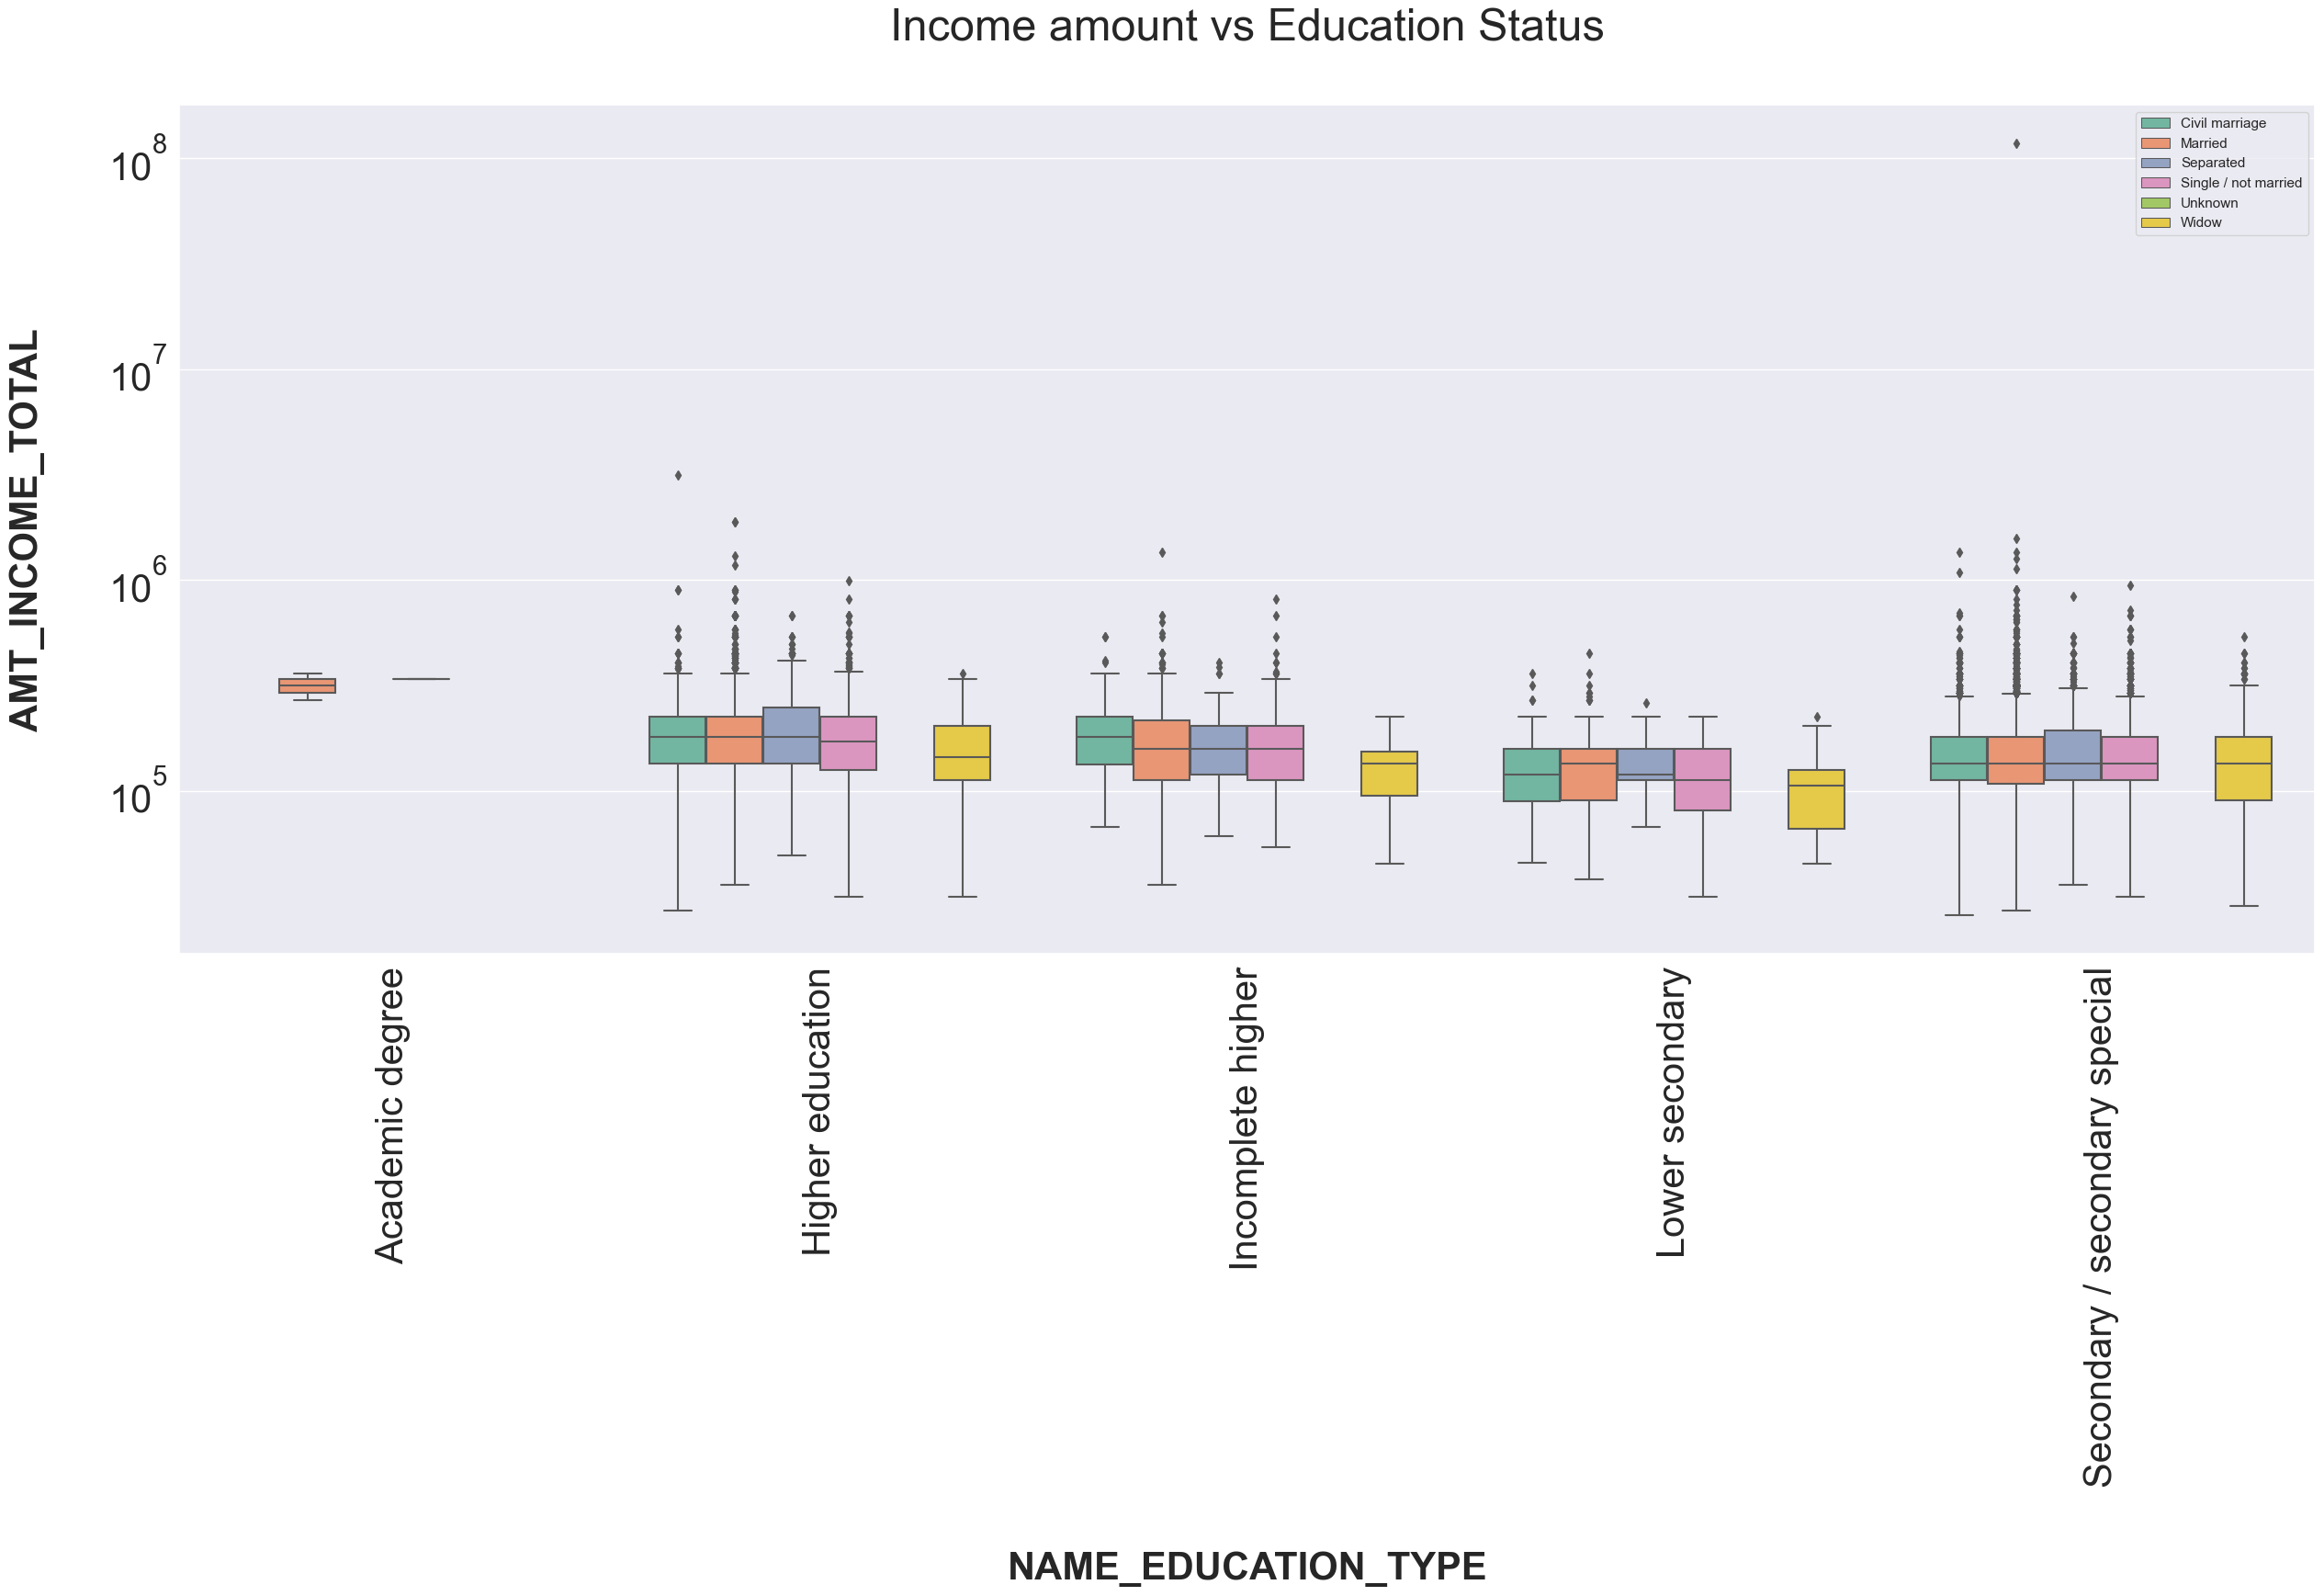

In [129]:
plt.figure(figsize=(30,12)) 
plt.yscale('log')                     #As the values are too large, it is convinient to use log for better analysis
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',   #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


plt.legend( loc = 'upper right')                                              #Adjusting legend position
plt.title('Income amount vs Education Status',fontsize= 35)
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_INCOME_TOTAL",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()

Insights
•	The income amount for Married clients with an academic degree is much lesser as compared to others.
•	(Defaulter) Clients have relatively less income as compared to Non-defaulters.


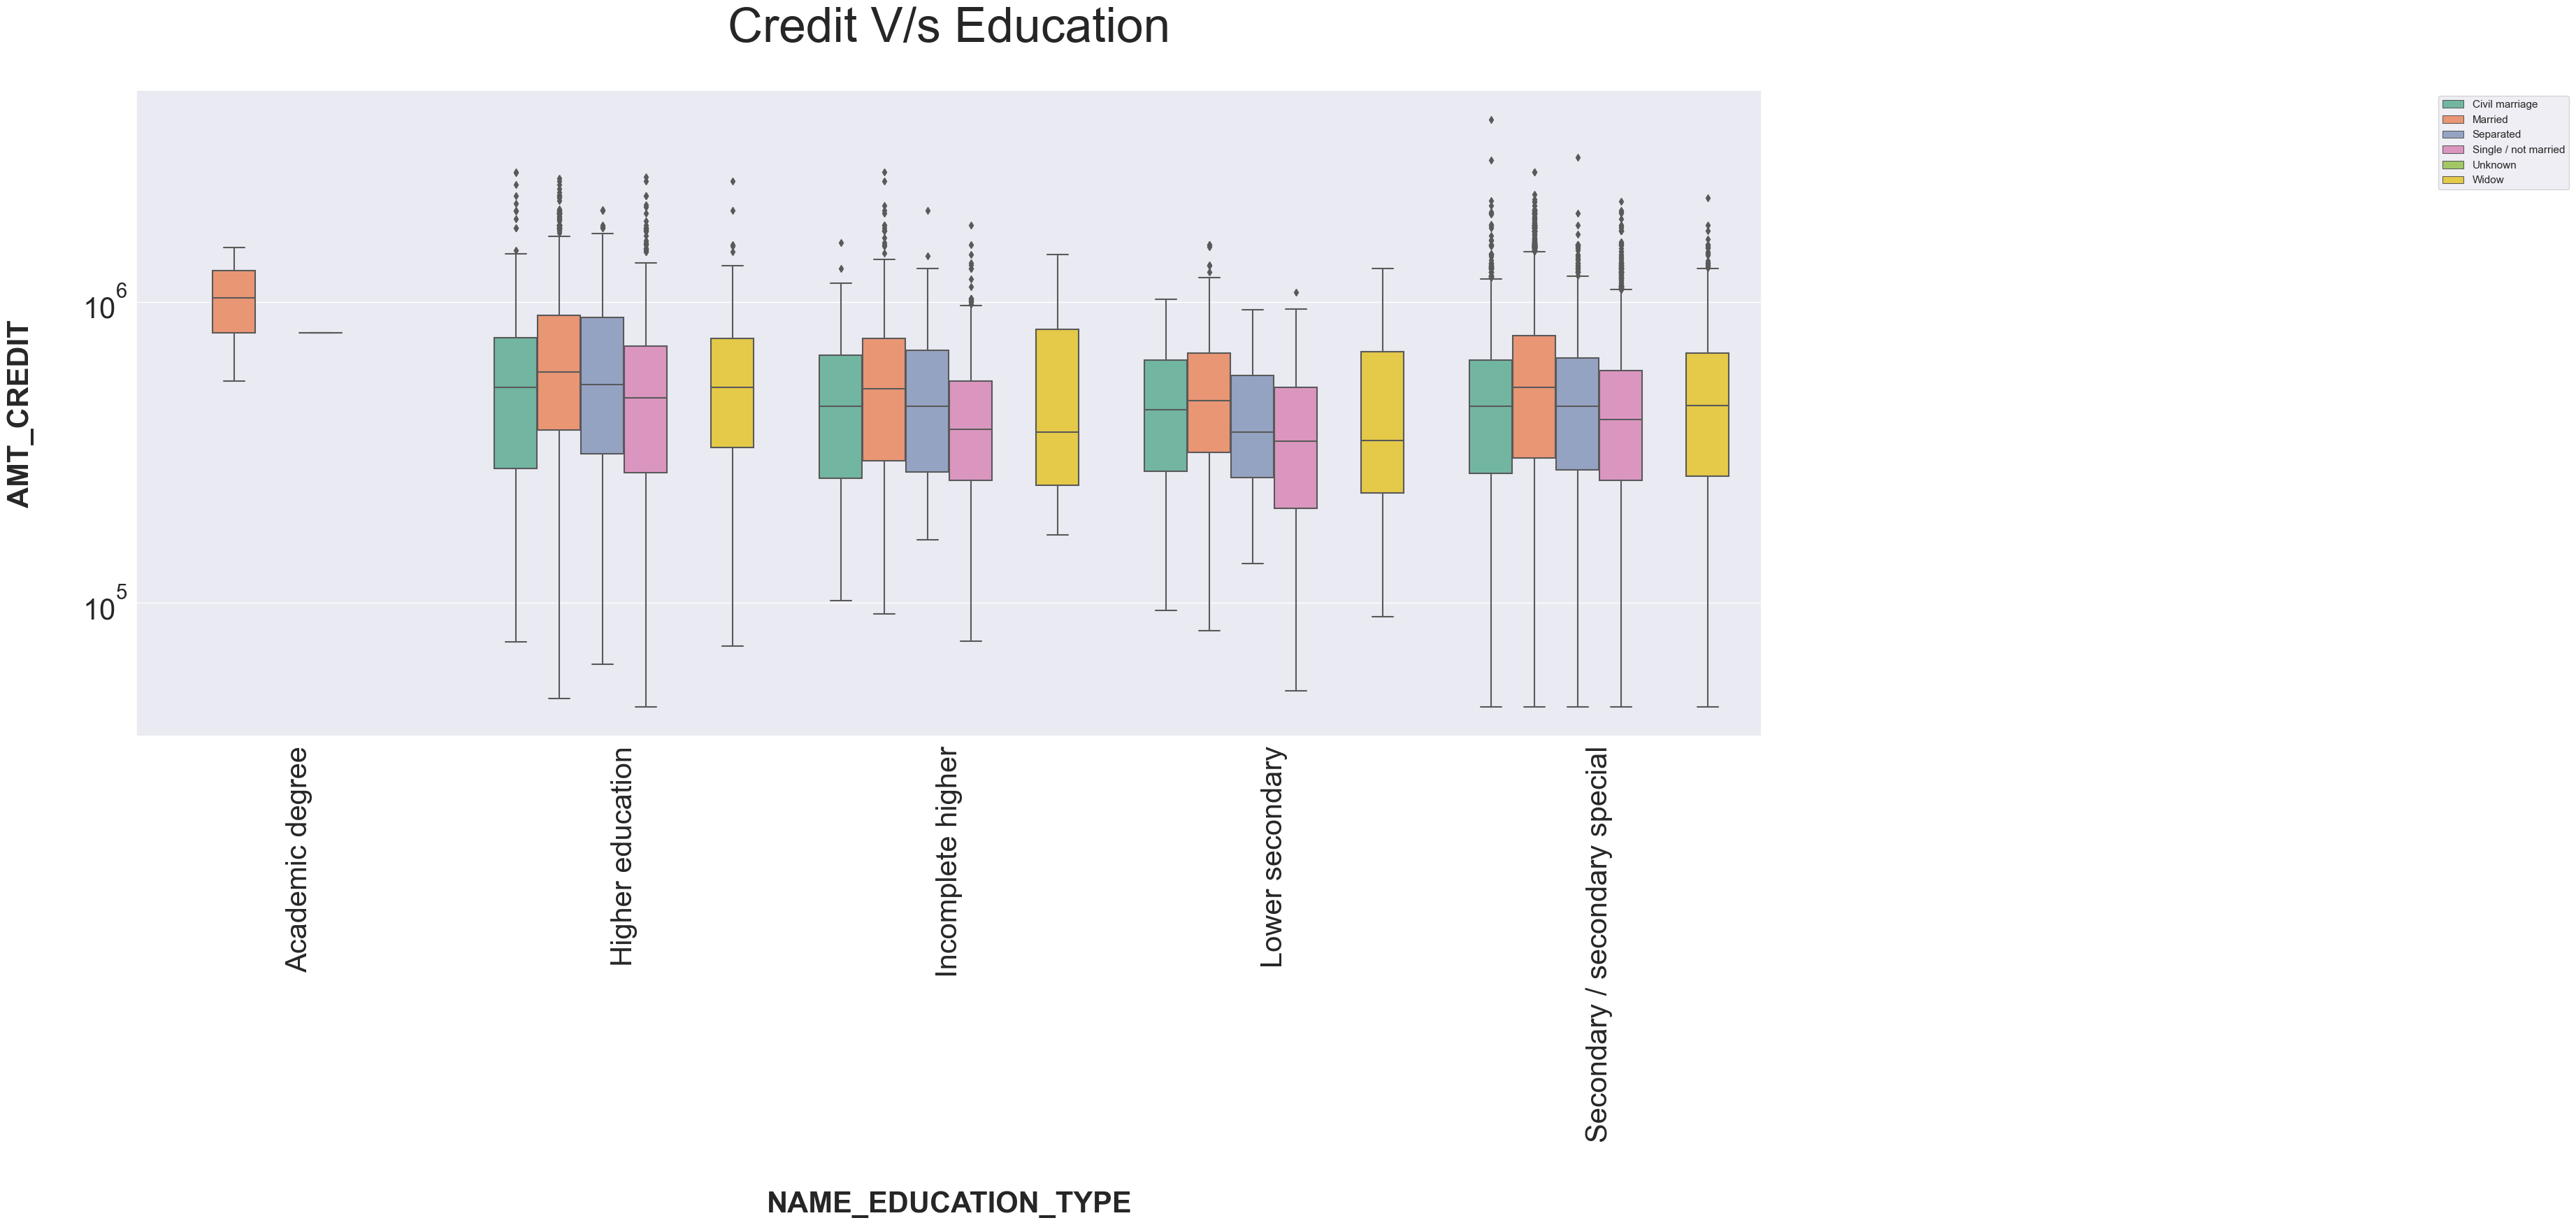

In [130]:
plt.figure(figsize=(30,12))               #As the values are too large, it is convinient to use log for better analysis
plt.yscale('log')                       
plt.xticks(rotation = 90)


sns.boxplot(data =Target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',      #Boxplot w.r.t Data Target 1
            hue ='NAME_FAMILY_STATUS',orient='v',palette='Set2')


 
plt.legend( bbox_to_anchor=(1.5, 1),loc = 'upper right')              #Adjusting legend position
plt.title('Credit V/s Education',fontsize=50 )
plt.xlabel("NAME_EDUCATION_TYPE",fontsize= 30, fontweight="bold")
plt.ylabel("AMT_CREDIT",fontsize= 30, fontweight="bold")
plt.xticks(rotation=90, fontsize=30)
plt.yticks(rotation=360, fontsize=30)

plt.show()


Insights
•	Married client with academic applied for a higher credit loan. And doesn’t have outliers. Single clients with academic degrees have a very slim boxplot with no outliers.
•	Some of the clients with Higher Education, Incomplete Higher Education, Lower Secondary Education and Secondary/Secondary Special Education are more likely to take a high amount of credit loans.




## Bivariate Analysis of Categorical-Categorical to Find the Maximum % Clients with Loan-Payment Difficulties

In [132]:
def biplot(df,feature,title):
    temp = df[feature].value_counts()
    
# Calculate the percentage of target=1 per category value    

    perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean() 
    perc.sort_values(by='TARGET', ascending=False, inplace=True)
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=("Count of "+ title,"% of Loan Payment difficulties within each category"))
    fig.add_trace(go.Bar(x=temp.index, y=temp.values),row=1, col=1)
    fig.add_trace(go.Bar(x=perc[feature].to_list(), y=perc['TARGET'].to_list()),row=1, col=2)
    fig['layout']['xaxis']['title']=feature
    fig['layout']['xaxis2']['title']=feature
    fig['layout']['yaxis']['title']='Count'
    fig['layout']['yaxis2']['title']='% of Loan Payment Difficulties'
    fig.update_layout(height=600, width=1000, title_text=title, showlegend=False)
    fig.show()

## Distribution of Amount Income Range and the category with maximum % Loan-Payment Difficulties

In [133]:
biplot(df_credit ,'AMT_INCOME_TYPE','Income range')

## Distribution of Type of Income and the category with maximum Loan-Payment Difficulties

In [134]:
biplot(df_credit ,'NAME_INCOME_TYPE','Income type')

## Distribution of Contract Type and the category with maximum Loan-Payment Difficulties

In [135]:
biplot(df_credit ,'NAME_CONTRACT_TYPE','Contract type')

## Distribution of Education Type and the category with maximum Loan-Payment Difficulties

In [136]:
biplot(df_credit ,'NAME_EDUCATION_TYPE','Education type')

## Distribution of Housing Type and the category with maximum Loan-Payment Difficulties

In [137]:
biplot(df_credit ,'NAME_HOUSING_TYPE','Housing type')

## Distribution of Occupation Type and the category with maximum Loan-Payment Difficulties

In [138]:
biplot(df_credit ,'OCCUPATION_TYPE','Occupation type')

## Distribution of CODE_GENDER with respect to AMT_INCOME_RANGE to find maximum % Loan-Payment Difficulties using pivot table

In [139]:
table= pd.pivot_table(df_credit, values='TARGET', index=['CODE_GENDER','AMT_INCOME_TYPE'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

table

NAME_EDUCATION_TYPE          Academic degree  Higher education  \
CODE_GENDER AMT_INCOME_TYPE                                      
F           VERY_LOW                0.000000          0.056068   
            LOW                     0.000000          0.049022   
            MEDIUM                  0.000000          0.050254   
            HIGH                    0.105263          0.041516   
            VERY_HIGH               0.076923          0.037289   
M           VERY_LOW                0.000000          0.080411   
            LOW                     0.000000          0.073305   
            MEDIUM                  0.000000          0.070086   
            HIGH                    0.000000          0.055911   
            VERY_HIGH               0.000000          0.044080   

NAME_EDUCATION_TYPE          Incomplete higher  Lower secondary  \
CODE_GENDER AMT_INCOME_TYPE                                       
F           VERY_LOW                  0.086399         0.080193   
            LOW                       0.080075         0.113889   
            MEDIUM                    0.078431         0.096983   
            HIGH                      0.074313         0.038961   
            VERY_HIGH                 0.082251         0.066667   
M           VERY_LOW                  0.123967         0.125000   
            LOW                       0.097778         0.142857   
            MEDIUM                    0.095130         0.150515   
            HIGH                      0.074627         0.081633   
            VERY_HIGH                 0.077586         0.064516   

NAME_EDUCATION_TYPE          Secondary / secondary special  
CODE_GENDER AMT_INCOME_TYPE                                 
F           VERY_LOW                              0.076778  
            LOW                                   0.079523  
            MEDIUM                                0.075692  
            HIGH                                  0.070736  
            VERY_HIGH                             0.065930  
M           VERY_LOW                              0.118066  
            LOW                                   0.123693  
            MEDIUM                                0.113466  
            HIGH                                  0.093484  
            VERY_HIGH                             0.089939

Insights

Female clients with an Academic degree and high-income type have a higher risk of default
Male clients with Secondary/Secondary Special Education having all types of salaries have a higher risk of default.
Male clients with Incomplete Education having very low salaries have a high risk of default.
Male Clients with Lower Secondary Education having very low or medium have a high risk to default

## Let’s check correlations in the data visually. For that make a list of all numeric features.

In [140]:
numerical_col = df_credit.select_dtypes(include='number').columns
numerical_col
len(numerical_col)

35

## Let’s use pairplot to get the required charts.

C:\Users\TAHA RAZVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



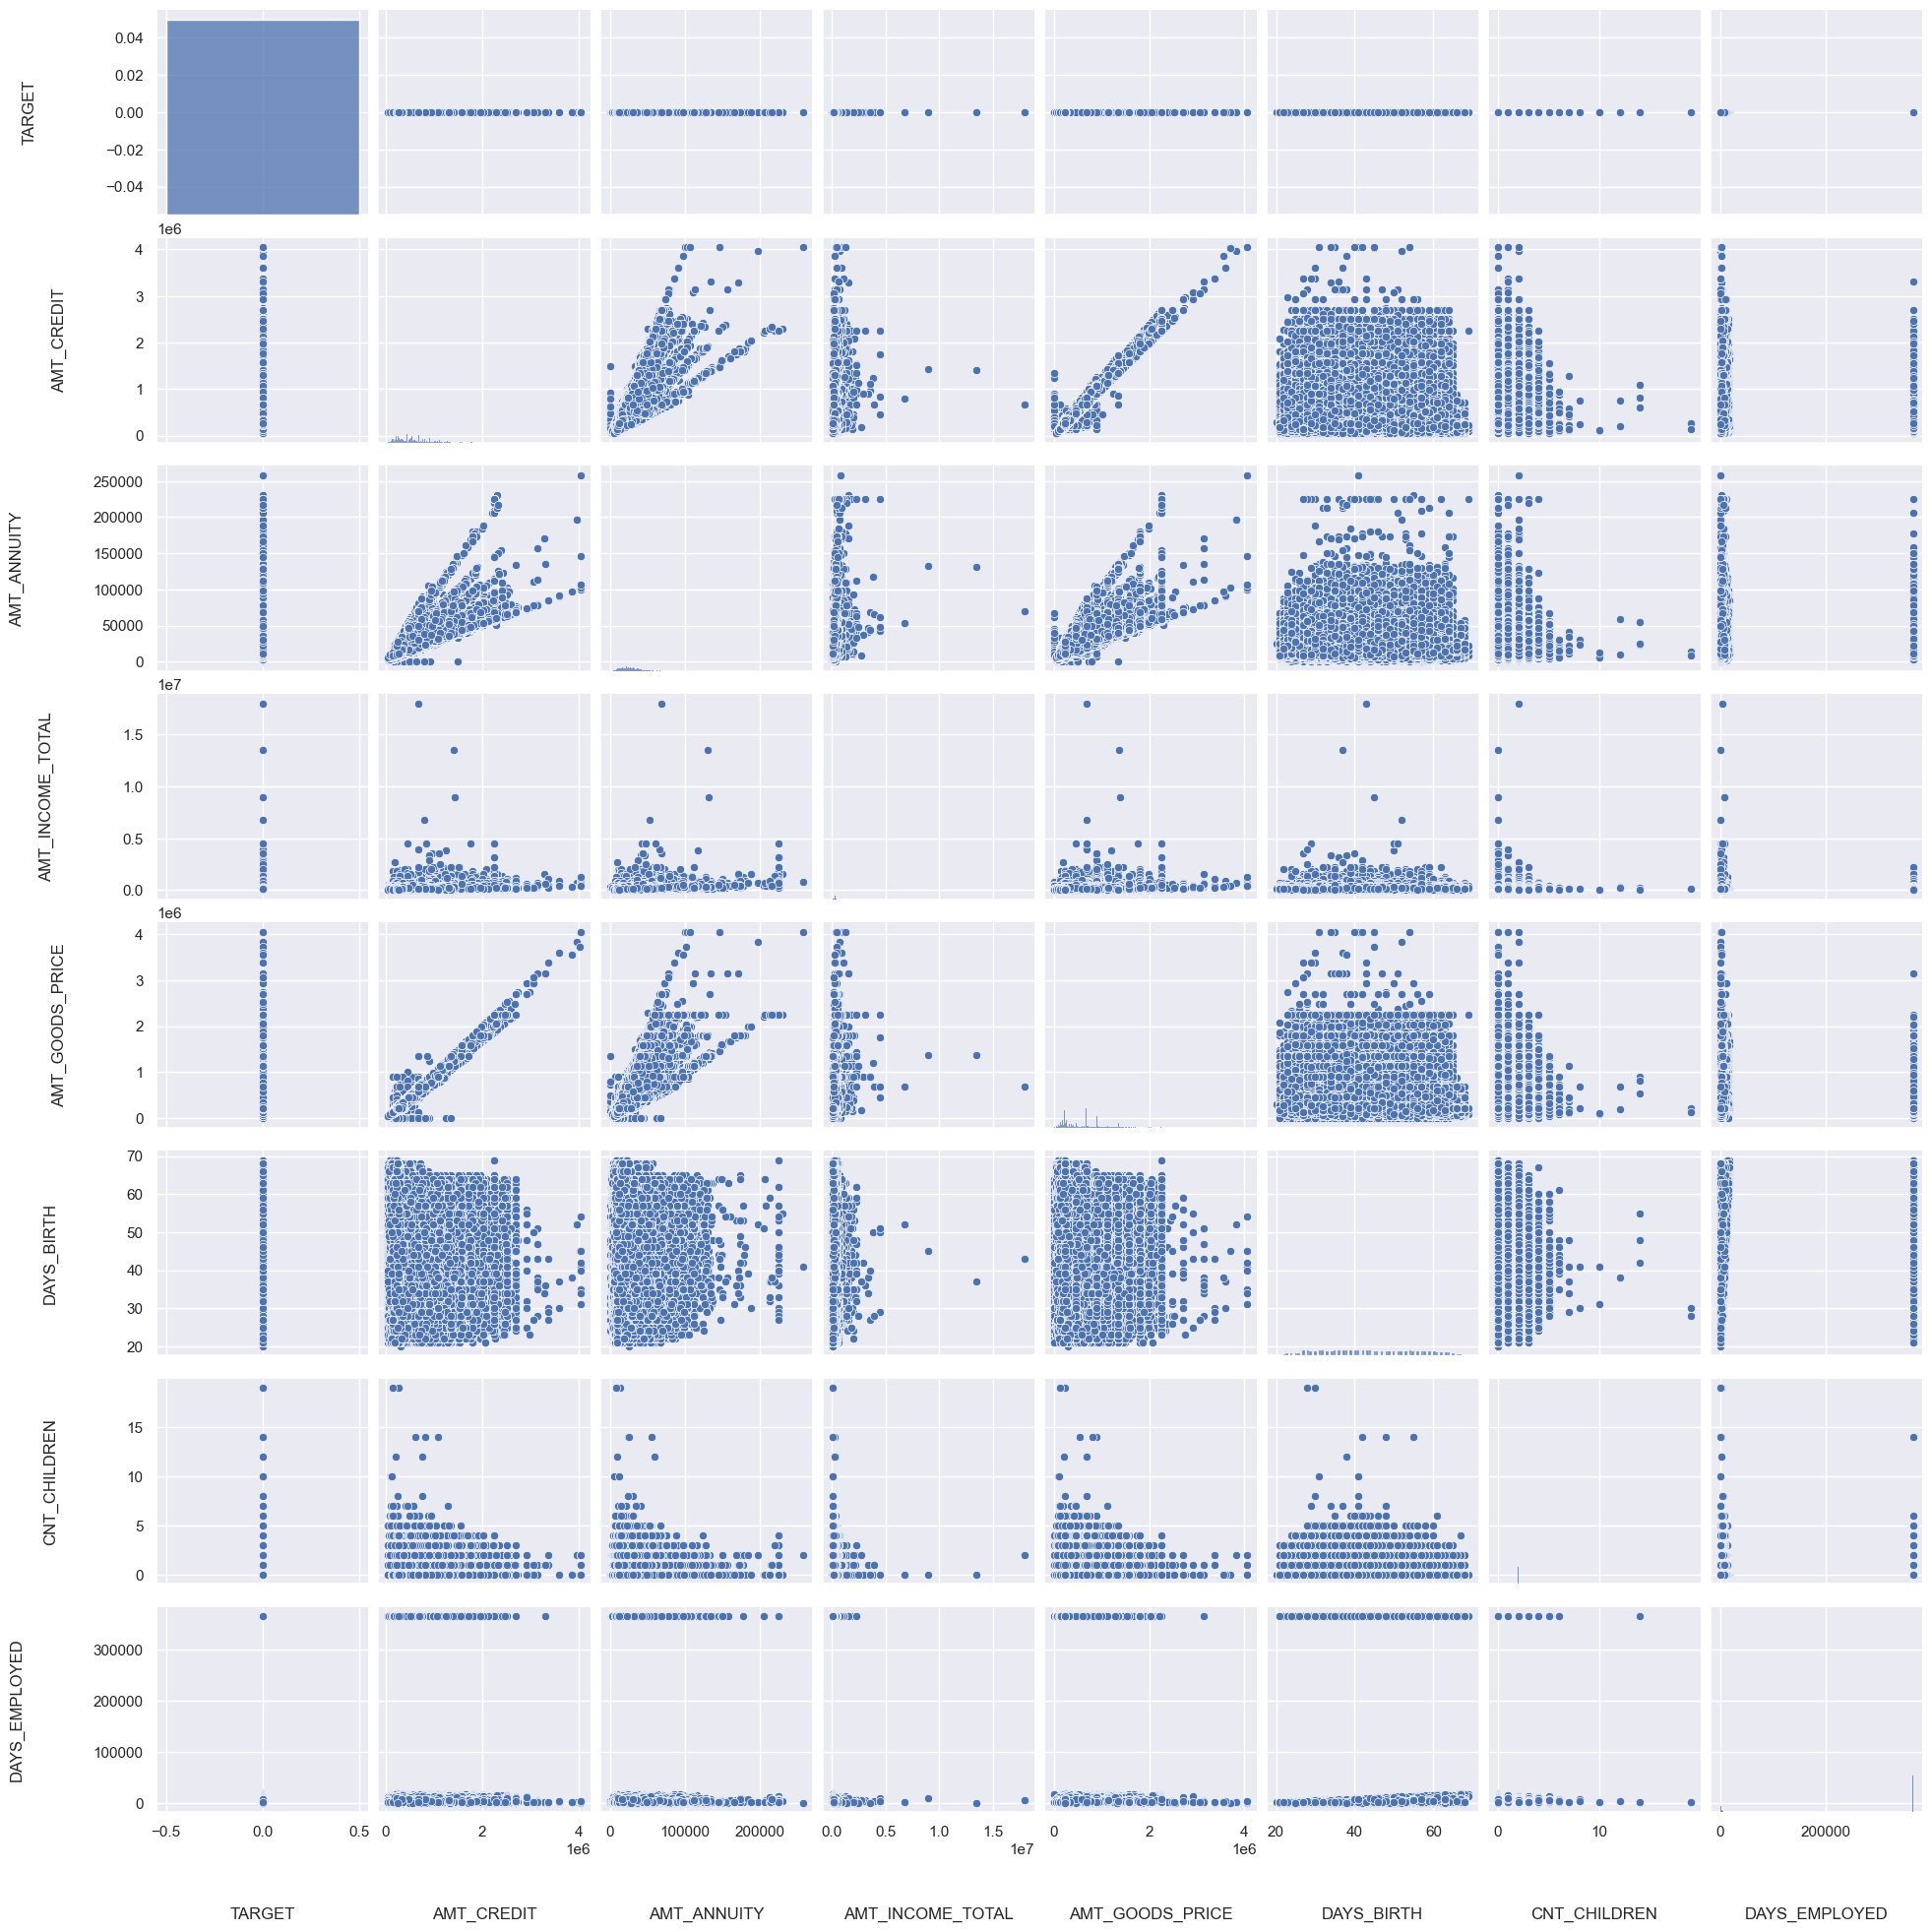

In [141]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

In [ ]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

Insights

AMT_CREDIT and AMT_GOODS_PRICE are highly correlated variables for both defaulters and non – defaulters. So as the home price increases the loan amount also increases
AMT_CREDIT and AMT_ANNUITY (EMI) are highly correlated variables for both defaulters and non – defaulters. So as the home price increases the EMI amount also increases which is logical
All three variables AMT_CREDIT, AMT_GOODS_PRICE and AMT_ANNUITY are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection


In [ ]:
##Random Forest

In [142]:
numerical= df_credit.select_dtypes('number').columns

categorical = df_credit.select_dtypes('object').columns

print(f'Numerical Columns:  {df_credit[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df_credit[categorical].columns}')

Numerical Columns:  Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


In [144]:
df_credit.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  int32   
 5   FLAG_OWN_REALTY              307511 non-null  int32   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer



# Encode categorical variables
cat_cols = df_credit.select_dtypes(include=['category']).columns
label_encoder = LabelEncoder()
for col in cat_cols:
    df_credit[col] = label_encoder.fit_transform(df_credit[col])

# Separate features (X) and target variable (y)
X = df_credit.drop(['SK_ID_CURR', 'TARGET'], axis=1)  # Exclude ID and target variable
y = df_credit['TARGET']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# Split the df_creditset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.9196949742288995


In [150]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


F1 Score: 0.008033741715203857
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.67      0.00      0.01      4949

    accuracy                           0.92     61503
   macro avg       0.79      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



In [153]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.3/99.8 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.7/99.8 MB 4.9 MB/s eta 0:00:21
   ---------------------------------------- 1.2/99.8 MB 6.2 MB/s eta 0:00:16
    --------------------------------------- 1.7/99.8 MB 6.8 MB/s eta 0:00:15
    --------------------------------------- 2.2/99.8 MB 7.5 MB/s eta 0:00:14
   - -------------------------------------- 2.9/99.8 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.5/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------------

## XGBoost

In [154]:
import xgboost as xgb


In [155]:
# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


In [156]:
# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [157]:
# Predict on the testing data
y_pred = xgb_classifier.predict(X_test)


In [158]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9187681901695852
Confusion Matrix:
[[56363   191]
 [ 4805   144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.43      0.03      0.05      4949

    accuracy                           0.92     61503
   macro avg       0.68      0.51      0.51     61503
weighted avg       0.88      0.92      0.88     61503



In [159]:
# Fine tuning hyperparameters of grid search

In [ ]:
fine-tune the hyperparameters of the XGBoost classifier to optimize its performance further. This can be done using techniques like grid search or random search. Here's an example of how to perform hyperparameter tuning using grid search

In [160]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Best Model Accuracy: 0.9198250491845926


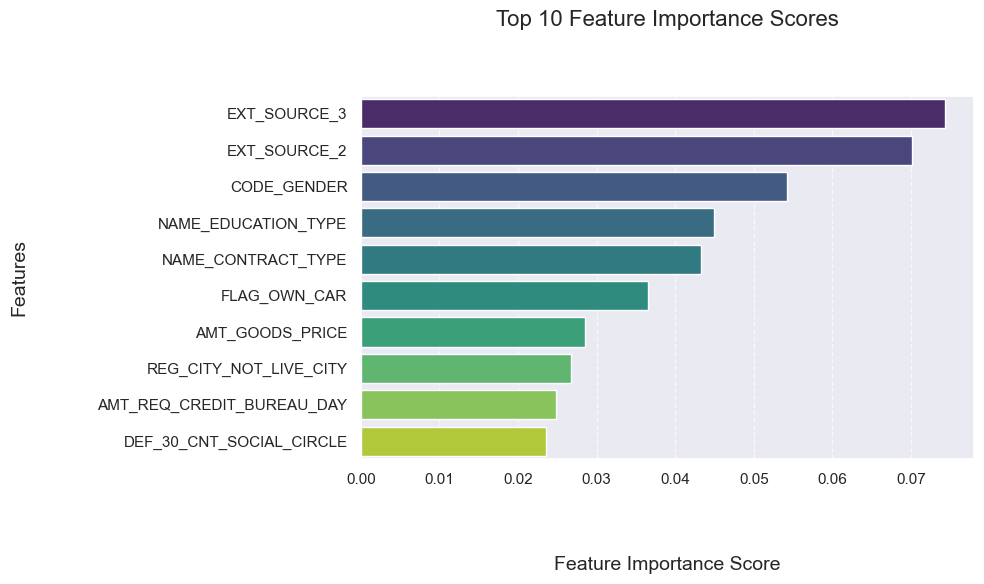

In [164]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Extract feature importance scores from the trained classifier
feature_importance = xgb_classifier.feature_importances_

# Get the names of features (if available)
feature_names = X_train.columns  # Assuming X_train is a DataFrame with named columns

# Create a dictionary mapping feature names to importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort feature importance dictionary by values (importance scores)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Get top 10 features
top_features = dict(sorted_feature_importance[:10])

# Plot feature importance for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_features.values()), y=list(top_features.keys()), palette="viridis")
plt.xlabel('Feature Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Top 10 Feature Importance Scores', fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
